# **Web Scraping et analyse des meilleures ventes sur Amazon**

---

##  **Introduction**
Le commerce électronique a connu une croissance exponentielle ces dernières années, et Amazon est l'une des principales plateformes de vente en ligne. Comprendre les tendances des meilleures ventes sur Amazon peut offrir des **informations précieuses sur les préférences des consommateurs, l'évolution des prix et la popularité des produits**.

Dans ce projet, nous allons **scraper les premières pages des meilleures ventes** de plusieurs catégories de produits sur Amazon à l'aide de **BeautifulSoup** et **Requests**. Une fois les données collectées, nous les **nettoierons, explorerons et analyserons** pour en extraire des **tendances et insights**. Nous ferons de même avec une classe spécifique de produits en ajoutant des **caractéritiques techniques** bien précis.

Enfin, nous appliquerons des **modèles de Machine Learning** pour identifier des schémas cachés et faire des prédictions sur les tendances des produits et quels produits finiront dans les **Best Sellers**.

---

## **Plan du projet**

### *1.Collecte des données*

Nous allons récupérer les informations des produits des premières pages des meilleurs ventes Amazon pour plusieurs catégories.

Nous allons commencer par extraite seulement le nom du produit pour une seule catégorie, puis plus d'éléments ( prix, évaluation, nombre d'avis, classement, url), puis plus de catégories, et enfin nous essaierons de prendre en compte plusieurs pages.

Nous allons également extraire une base de données des caractéristiques techniques des cartes graphiques vendues sur Amazon.




### *2.Nettoyage et préparation des données*

Nous allons supprimer les valeurs manquantes et les doublons, convertir au bon format les valeurs et vérifier s'il existe des valeurs aberrantes



### *3.Analyse exploratoire des données*

Nous allons rechercher des relations sur la distribution entre les variables, comme la corrélation entre le prix et la catégorie, le nombre d'avis et l'évaluation, etc...

Nous allons également essayer d'identifier les produits sous-évalués ou surévalués.



### *4.Prédictions et Machine Learning*

Nous allons tester des modélisations pour faire des prédictions sur les produits (régression, classification...) pour essayer d'extraire les caractéristiques techniques qui sont importantes pour le succès d'un produit technologique.



### *5.Tableau de bord et interprétation*

Faire un rapport final et interpréter les résultats pour conclure.


---

## **Sommaire**

### 1. Construction et étude préliminaire d'une base de données de Best Sellers d'Amazon
- [1.1 Construction de la base de données Best Sellers](#11-Construction-de-la-base-de-données-Best-Sellers)
  - [1.1.1 Pour une seule page, une seule catégorie et une seule information](#111-Pour-une-seule-page-une-seule-catégorie-et-une-seule-information)
  - [1.1.2 Pour une seule page, plusieurs catégories et deux informations](#112-Pour-une-seule-page-plusieurs-catégories-et-deux-informations)
  - [1.1.3 Pour une seule page, plusieurs catégories et plusieurs informations](#113-Pour-une-seule-page-plusieurs-catégories-et-plusieurs-informations)
  - [1.1.4 Pour plusieurs pages, plusieurs catégories et plusieurs informations](#114-Pour-plusieurs-pages-plusieurs-catégories-et-plusieurs-informations)

- [1.2 Traitement de notre base de données Best Sellers](#12-Traitement-de-notre-base-de-données-Best-Sellers)
  - [1.2.1 Conversion numérique des colonnes](#121-Conversion-numérique-des-colonnes)
  - [1.2.2 Analyse graphique des données](#122-Analyse-graphique-des-données)

### 2. Construction et étude d'une base de caractéristiques techniques des cartes graphiques d'Amazon
- [2.1 Construction et étude de la base prix/avis de cartes graphiques](#21-Construction-et-étude-de-la-base-prixavis-de-cartes-graphiques)
  - [2.1.1 Récupération des caractéristiques primaires et URL](#211-Récupération-des-caractéristiques-primaires-et-URL)
  - [2.1.2 Nettoyage de la base](#212-Nettoyage-de-la-base)
  - [2.1.3 Étude graphique préliminaire](#213-Étude-graphique-préliminaire)

- [2.2 Construction et étude de la base des caractéristiques techniques](#22-Construction-et-étude-de-la-base-des-caractéristiques-techniques)





---

## **Pipeline du projet**

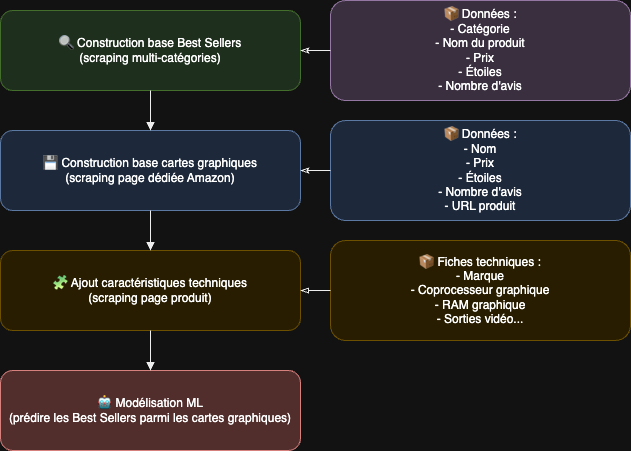



---

## **1 Construction et étude préliminaire d'une base de donnée de Best Sellers d'Amazon**

Nous allons utiliser les méthodes apprises avec beautifulsoup pour extraire des informations du code HTML des pages de bestsellers d'Amazon

In [ ]:
pip install requests beautifulsoup4 pandas plotly


In [ ]:
pip install -U kaleido


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from IPython.display import display, Markdown
import kaleido

### ***1.1 Construction de la base de donnée Best Sellers***

On va petit à petit extraire la base de données des Best Sellers

#### *1.1.1 Pour une seule page, une seule catégorie et une seule information*

On va commencer par extraire seulement le nom des produits de la première page des meilleures ventes en électronique pour s'habituer au fonctionnement du code HTML du site.

Le nom de la classe du nom des produits varie mais contient toujours la suite de caractères "p13n-sc-css", on va donc rechercher cette suite grâce à la bibliothèque d'expressions régulières.

In [ ]:

# URL de la page des meilleures ventes en électronique
url = "https://www.amazon.fr/gp/bestsellers/electronics"

# User-Agent pour éviter le blocage par Amazon
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36",
    "Accept-Language": "fr-FR,fr;q=0.9"
}

# Envoyer la requête GET
response = requests.get(url, headers=headers)

# Vérifier si la requête a réussi
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Liste pour stocker les noms de produits
    product_names = []

    # Chercher tous les éléments avec une classe contenant "p13n-sc-css"
    for product in soup.find_all(class_=lambda value: value and "p13n-sc-css" in value):
        # Extraire le nom du produit
        product_name = product.text.strip()

        # Ajouter le nom du produit à la liste
        product_names.append(product_name)


    # Afficher les noms des produits
    print(" Meilleures ventes en Électronique sur Amazon :\n")
    for idx, product_name in enumerate(product_names, start=1):
        print(f"{idx}. {product_name}")

else:
    print(f" Erreur : Impossible d'accéder à la page. Code {response.status_code}")

 Meilleures ventes en Électronique sur Amazon :

1. Amazon Fire TV Stick HD (Nouvelle génération) | TV gratuite et en direct, télécommande vocale Alexa, contrôle de la maison connectée, streaming HD
2. Tapo 2K(3MP) Caméra Surveillance WiFi intérieure 360° C210, Vision nocturne, Notifications en temps réel, Détection de personne, Suivi de mouvement, Télécommande, Compatible avec Alexa
3. Aioneus Chargeur USB C, 40W 4 Port Prise USBC Chargeur Rapide iPhone, Multi Secteur PD+QC 3.1A Type C Adaptateur pour iPhone 16 15 14 13 12 11 Pro Max X XS XR 8 7 6S Plus Mini SE, iPad,Samsung Galaxy
4. Apple AirTag
5. INIU Batterie Externe, 22.5W 10000mAh Power Bank, Batterie Portable USB C Input & Output PD3.0 QC4.0 Charge Rapide Powerbank Compatible avec iPhone 16 15 14 13 12 Pro Max Plus Samsung iPad Pro etc
6. Imou 2K(3MP) Caméra Surveillance WiFi Intérieure Caméra 360° Connectée Smartphone avec Détection Humaine AI Suivi Intelligent Sirène Audio Bidirectionnel Compatible Alexa pour Bébé/Animaux
7.

On va faire pareil pour le prix en recherchant la suite de caractères "p13n-sc-price"




In [ ]:
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Liste pour stocker les noms de produits
    product_prices = []

    # Chercher tous les éléments avec une classe contenant "p13n-sc-price"
    for product in soup.find_all(class_=lambda value: value and "p13n-sc-price" in value):
        # Extraire le nom du produit
        product_price = product.text.strip()

        # Ajouter le nom du produit à la liste
        product_prices.append(product_price)


    # Afficher les noms des produits
    print("Prix des meilleures ventes en Électronique sur Amazon :\n")
    for idx, product_price in enumerate(product_prices, start=1):
        print(f"{idx}. {product_price}")

else:
    print(f"⚠️ Erreur : Impossible d'accéder à la page. Code {response.status_code}")

Prix des meilleures ventes en Électronique sur Amazon :

1. 44,99 €
2. 16,58 €
3. 16,58 €
4. 9,99 €
5. 9,99 €
6. 30,07 €
7. 16,64 €
8. 17,50 €
9. 6,66 €
10. 6,66 €
11. 116,48 €
12. 6,66 €
13. 6,66 €
14. 37,44 €
15. 10,99 €
16. 5,53 €
17. 12,99 €
18. 12,99 €
19. 10,80 €
20. 10,80 €
21. 16,82 €
22. 14,99 €
23. 14,99 €
24. 7,56 €
25. 7,56 €
26. 16,99 €
27. 16,99 €
28. 101,90 €
29. 101,90 €
30. 5,04 €
31. 8,32 €
32. 8,32 €
33. 15,04 €
34. 11,99 €
35. 28,19 €
36. 12,91 €
37. 12,91 €
38. 6,64 €
39. 28,29 €
40. 179,99 €
41. 99,00 €


---

#### *1.1.2 Pour une seule page, plusieurs catégories et deux informations*

On va faire une boucle for sur plusieurs catégories en appliquant le même code que précédemment.

In [ ]:
# Headers pour éviter d'être bloqué par Amazon (changer de User-Agent régulièrement)

headers_list = [
    {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"}
]

In [ ]:
# Définition des catégories et des URLs associées
categories = {
    "High-Tech": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Livres": "https://www.amazon.fr/gp/bestsellers/books",
    "Mode": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Maison & Cuisine": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Jeux et Jouets": "https://www.amazon.fr/gp/bestsellers/toys"
}

# Liste pour stocker les résultats
produits = []

In [ ]:
# Fonction pour scraper une catégorie Amazon

def scraper_categorie(nom_categorie, url):
    produits_scrapes = 0

    while produits_scrapes < 30: # Limite de scraping
        print(f"Scraping de la catégorie {nom_categorie}...")

        # Rotation des User-Agent pour ne pas être bloqué
        headers = random.choice(headers_list)

        # Envoyer la requête HTTP
        response = requests.get(url, headers=headers)

        # Vérifier si la requête est bloquée
        if response.status_code != 200:
            print(f"⚠️ Accès bloqué pour {nom_categorie}. Code: {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")

        # Trouver les produits
        items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

        for item in items:
            if produits_scrapes >= 30:
                break  # Stop si on atteint 30 produits

            try:
                nom = item.find(class_=lambda value: value and "p13n-sc-css" in value).text.strip()
            except:
                nom = "Non Disponible"

            try:
                prix = item.find(class_=lambda value: value and "p13n-sc-price" in value).text.strip()
            except:
                prix = "Non Disponible"

            # Stocker les informations du produit
            produits.append({
                "Catégorie": nom_categorie,
                "Nom du Produit": nom,
                "Prix": prix,
            })
            produits_scrapes += 1


In [ ]:
# Exécution du scraping pour chaque catégorie
for categorie, url in categories.items():
    scraper_categorie(categorie, url)


Scraping de la catégorie High-Tech...
Scraping de la catégorie Livres...
Scraping de la catégorie Livres...
Scraping de la catégorie Livres...
Scraping de la catégorie Mode...
Scraping de la catégorie Mode...
Scraping de la catégorie Mode...
Scraping de la catégorie Mode...
Scraping de la catégorie Mode...
Scraping de la catégorie Mode...
Scraping de la catégorie Maison & Cuisine...
Scraping de la catégorie Maison & Cuisine...
Scraping de la catégorie Jeux et Jouets...
Scraping de la catégorie Jeux et Jouets...
Scraping de la catégorie Jeux et Jouets...
Scraping de la catégorie Jeux et Jouets...
Scraping de la catégorie Jeux et Jouets...
Scraping de la catégorie Jeux et Jouets...



Pour pouvoir l'étudier ultérieurement, on va construire une base de données df avec panda contenant les informations que nous avons récupéré.

In [ ]:
# Sauvegarde des données en CSV
df = pd.DataFrame(produits)
#df.to_csv("Table_1.csv", index=False, encoding="utf-8")
print("✅ Scraping terminé ! Les données sont enregistrées dans 'Table_1.csv'.")


✅ Scraping terminé ! Les données sont enregistrées dans 'Table_1.csv'.


In [ ]:
df = pd.read_csv("Table_1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Catégorie       150 non-null    object
 1   Nom du Produit  150 non-null    object
 2   Prix            150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [ ]:
df.head(50)

,Catégorie,Nom du Produit,Prix
0,High-Tech,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €"
1,High-Tech,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €"
2,High-Tech,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €"
3,High-Tech,Apple AirTag,"30,07 €"
4,High-Tech,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,22 €"
5,High-Tech,Imou 2K(3MP) Caméra Surveillance WiFi Intérieu...,"18,99 €"
6,High-Tech,Batterie Externe 20000mAh 22.5W PD3.0 QC4.0 Po...,"10,99 €"
7,High-Tech,"JBL GO 4, Enceinte Bluetooth ultra-portable, s...","37,44 €"
8,High-Tech,Duracell Plus Piles AAA (lot de 12) - Alcaline...,"6,66 €"
9,High-Tech,Chargeur for iPhone 14/14 Pro /14 Pro Max /14 ...,"12,99 €"


In [ ]:
df.describe()

,Catégorie,Nom du Produit,Prix
count,150,150,150
unique,5,150,117
top,High-Tech,Amazon Fire TV Stick HD (Nouvelle génération) ...,"9,99 €"
freq,30,1,4


---

#### *1.1.3 Pour une seule page, plusieurs catégories et plusieurs informations*

On va rajouter des catégories et des informations pour avoir un dataframe plus complet. On va ajouter le classement, l'évaluation, le nombre d'avis et l'url du produit.

In [ ]:
# On va ajouter des catégories
categories = {
    "High-Tech": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Livres": "https://www.amazon.fr/gp/bestsellers/books",
    "Mode": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Maison & Cuisine": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Jeux et Jouets": "https://www.amazon.fr/gp/bestsellers/toys",
    "Sport & Loisirs": "https://www.amazon.fr/gp/bestsellers/sports",
    "Beauté et Santé": "https://www.amazon.fr/gp/bestsellers/beauty",
    "Auto et Moto": "https://www.amazon.fr/gp/bestsellers/automotive",
    "Montres et Bijoux": "https://www.amazon.fr/gp/bestsellers/watches", #Cette catégorie ne contient aucun bestsellers, il faut ajouter un break
    "Informatique": "https://www.amazon.fr/gp/bestsellers/computers"
}

# Liste pour stocker les résultats
produits = []

In [ ]:
# Fonction pour scraper une catégorie Amazon, on rajoute des informations

def scraper_categorie(nom_categorie, url):
    produits_scrapes = 0

    while produits_scrapes < 30: # Limite de scraping
        print(f"Scraping de la catégorie {nom_categorie}...")

        # Rotation des User-Agent pour ne pas être bloqué
        headers = random.choice(headers_list)

        # Envoyer la requête HTTP
        response = requests.get(url, headers=headers)

        # Vérifier si la requête est bloquée
        if response.status_code != 200:
            print(f"⚠️ Accès bloqué pour {nom_categorie}. Code: {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")


        # Trouver les produits
        items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

           # Vérifier si la catégorie contient des produits, sinon arrêter
        if not items:
            print(f"Aucun produit trouvé pour la catégorie {nom_categorie}. Passage à la suivante.")
            return  # Arrêt du scraping pour cette catégorie

        for item in items:
            if produits_scrapes >= 30:
                break  # Stop si on atteint 30 produits

            try:
                nom = item.find(class_=lambda value: value and "p13n-sc-css" in value).text.strip()
            except:
                nom = "Non Disponible"

            try:
                prix = item.find(class_=lambda value: value and "p13n-sc-price" in value).text.strip()
            except:
                prix = "Non Disponible"

            try:
                etoiles = item.find(class_=lambda value: value and "a-icon-alt" in value).text.strip()
            except:
                etoiles = "Non Disponible"

            try:
                nb_avis = item.find(class_=lambda value: value and "a-size-small" in value).text.strip()
            except:
                nb_avis = "0"

            try:
                url_produit = "https://www.amazon.fr" + item.find("a", class_="a-link-normal")["href"]
            except:
                url_produit = "Non Disponible"

            # Stocker les informations du produit
            produits.append({
                "Catégorie": nom_categorie,
                "Nom du Produit": nom,
                "Prix": prix,
                "Évaluation (étoiles)": etoiles,
                "Nombre d'Avis": nb_avis,
                "URL": url_produit
            })
            produits_scrapes += 1

In [ ]:
# Exécution du scraping pour chaque catégorie
for categorie, url in categories.items():
    scraper_categorie(categorie, url)


Scraping de la catégorie High-Tech...
Aucun produit trouvé pour la catégorie High-Tech. Passage à la suivante.
Scraping de la catégorie Livres...
Aucun produit trouvé pour la catégorie Livres. Passage à la suivante.
Scraping de la catégorie Mode...
Aucun produit trouvé pour la catégorie Mode. Passage à la suivante.
Scraping de la catégorie Maison & Cuisine...
Aucun produit trouvé pour la catégorie Maison & Cuisine. Passage à la suivante.
Scraping de la catégorie Jeux et Jouets...
Aucun produit trouvé pour la catégorie Jeux et Jouets. Passage à la suivante.
Scraping de la catégorie Sport & Loisirs...
Scraping de la catégorie Beauté et Santé...
Aucun produit trouvé pour la catégorie Beauté et Santé. Passage à la suivante.
Scraping de la catégorie Auto et Moto...
Aucun produit trouvé pour la catégorie Auto et Moto. Passage à la suivante.
Scraping de la catégorie Montres et Bijoux...
Aucun produit trouvé pour la catégorie Montres et Bijoux. Passage à la suivante.
Scraping de la catégorie I

In [ ]:
# Sauvegarde des données en CSV
df = pd.DataFrame(produits)
#df.to_csv("Table_2.csv", index=False, encoding="utf-8")
print("✅ Scraping terminé ! Les données sont enregistrées dans 'Table_2.csv'.")


✅ Scraping terminé ! Les données sont enregistrées dans 'Table_2.csv'.


In [ ]:
df = pd.read_csv("Table_2.csv")

In [ ]:
df.head(100)

,Catégorie,Nom du Produit,Prix,Évaluation (étoiles),Nombre d'Avis,URL
0,High-Tech,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €","4,5 sur 5 étoiles",1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...
1,High-Tech,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €","4,5 sur 5 étoiles",31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...
2,High-Tech,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €","4,5 sur 5 étoiles",11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...
3,High-Tech,Apple AirTag,"30,07 €","4,6 sur 5 étoiles",124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...
4,High-Tech,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,22 €","4,6 sur 5 étoiles",25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...
...,...,...,...,...,...,...
95,Jeux et Jouets,Rubik's Cube - Rubiks Cube 3x3 - Jeu Casse-Têt...,"9,99 €","4,6 sur 5 étoiles",14 114,https://www.amazon.fr/RUBIKS-CUBE-3X3-Casse-T%...
96,Jeux et Jouets,Bundle Magic: The Gathering Tarkir : la tempêt...,"37,49 €",Non Disponible,0,https://www.amazon.fr/Bundle-Magic-Gathering-t...
97,Jeux et Jouets,"Beyblade X Set de Combat Xtreme, Jouet pour Ga...","24,58 €","4,6 sur 5 étoiles",1 524,https://www.amazon.fr/Hasbro-Beyblade-Beyblade...
98,Jeux et Jouets,"Cartes éducatives,Flash Jouets éducatifs pour ...","13,32 €","4,4 sur 5 étoiles",2 163,https://www.amazon.fr/%C3%A9ducatives-%C3%A9du...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Catégorie             240 non-null    object
 1   Nom du Produit        240 non-null    object
 2   Prix                  240 non-null    object
 3   Évaluation (étoiles)  240 non-null    object
 4   Nombre d'Avis         240 non-null    object
 5   URL                   240 non-null    object
dtypes: object(6)
memory usage: 11.4+ KB


In [ ]:
df.describe()

,Catégorie,Nom du Produit,Prix,Évaluation (étoiles),Nombre d'Avis,URL
count,240,240,240,240,240,240
unique,8,240,183,17,232,240
top,High-Tech,Amazon Fire TV Stick HD (Nouvelle génération) ...,"9,99 €","4,6 sur 5 étoiles",Freida McFadden,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...
freq,30,1,8,61,4,1


---

#### *1.1.4 Pour plusieurs pages, plusieurs catégories et plusieurs informations*

On va scraper plusieurs pages pour avoir une base de données plus importante et des valeurs plus significatives pour pouvoir faire des statistiques descriptives.

In [ ]:
produits = []

#Les noms des catégories doivent être en anglais pour correspondre à l'url dans le code pour changer la page

categories = {
    "Electronics": "https://www.amazon.fr/gp/bestsellers/electronics",
    "Books": "https://www.amazon.fr/gp/bestsellers/books",
    "Fashion": "https://www.amazon.fr/gp/bestsellers/fashion",
    "Kitchen": "https://www.amazon.fr/gp/bestsellers/kitchen",
    "Toys": "https://www.amazon.fr/gp/bestsellers/toys",
    "Sports": "https://www.amazon.fr/gp/bestsellers/sports",
    "Beauty": "https://www.amazon.fr/gp/bestsellers/beauty",
    "Automotive": "https://www.amazon.fr/gp/bestsellers/automotive",
    "Computers": "https://www.amazon.fr/gp/bestsellers/computers",
    "pc" : "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Graphics-Cards/zgbs/pc/284822" # Catégorie des cartes graphiques
}


In [ ]:
# Fonction pour scraper plusieurs pages pour une catégorie
def scraper_categorie(nom_categorie, base_url, max_pages=2):

  produits_scrapes = 0

  while produits_scrapes < 60: # Limite de scraping
        print(f"Scraping de la catégorie {nom_categorie}...")

        for page in range(1, max_pages + 1):
            url = f"{base_url}/ref=zg_bs_pg_{page}_{nom_categorie.lower()}?ie=UTF8&pg={page}" #Pour changer la page
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)

            if response.status_code != 200:
                print(f"⚠️ Accès bloqué pour {nom_categorie}, page {page}. Code: {response.status_code}")
                continue

            soup = BeautifulSoup(response.text, "html.parser")
            items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")


            for item in items:
                try:
                    nom = item.find(class_=lambda v: v and "p13n-sc-css" in v).text.strip()
                    prix = item.find(class_=lambda v: v and "p13n-sc-price" in v).text.strip()
                    etoiles = item.find(class_=lambda value: value and "a-icon-alt" in value).text.strip()
                    nb_avis = item.find(class_=lambda value: value and "a-size-small" in value).text.strip()
                    url_produit = "https://www.amazon.fr" + item.find("a", class_="a-link-normal")["href"]
                    best_seller = 1  # Marqué comme bestseller
                except:
                    continue

                produits.append({"Catégorie": nom_categorie, "Nom": nom, "Prix": prix, "Évaluation (étoiles)": etoiles, "Nombre d'Avis": nb_avis,
                                "URL": url_produit, "BestSeller": best_seller})
                produits_scrapes += 1

  return produits

Malheureusement, on ne peut pas scrapper plus de deux pages sans être bloqué par Amazon, nous allons donc nous limiter à 60 produits par catégorie.

In [ ]:
produits = []
for categorie, url in categories.items():
  scraper_categorie(categorie, url, max_pages=2)

df = pd.DataFrame(produits)

Scraping de la catégorie Electronics...
Scraping de la catégorie Electronics...
Scraping de la catégorie Electronics...
Scraping de la catégorie Books...
Scraping de la catégorie Books...
Scraping de la catégorie Books...
Scraping de la catégorie Books...
Scraping de la catégorie Books...
Scraping de la catégorie Fashion...
Scraping de la catégorie Fashion...
Scraping de la catégorie Fashion...
Scraping de la catégorie Kitchen...
Scraping de la catégorie Kitchen...
Scraping de la catégorie Kitchen...
Scraping de la catégorie Toys...
Scraping de la catégorie Toys...
Scraping de la catégorie Toys...
Scraping de la catégorie Toys...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Sports...
Scraping de la catégorie Beauty...
Scraping de la catégorie Beauty...
Scraping de 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Catégorie             698 non-null    object
 1   Nom                   698 non-null    object
 2   Prix                  698 non-null    object
 3   Évaluation (étoiles)  698 non-null    object
 4   Nombre d'Avis         698 non-null    object
 5   URL                   698 non-null    object
 6   BestSeller            698 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 38.3+ KB


In [ ]:
df.describe(include='all').loc[['count']]

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
count,698,698,698,698,698,698,698.0


In [ ]:
df.describe(include='all').loc[['unique']]

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
unique,10,524,365,31,491,698,NaN


In [ ]:
df.head(65)

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €","4,5 sur 5 étoiles",1 793,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €","4,5 sur 5 étoiles",31 865,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €","4,5 sur 5 étoiles",11 046,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,"30,07 €","4,6 sur 5 étoiles",124 139,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,64 €","4,6 sur 5 étoiles",25 185,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
60,Books,La femme de ménage,"8,15 €","4,5 sur 5 étoiles",Freida McFadden,https://www.amazon.fr/femme-m%C3%A9nage-Freida...,1
61,Books,Les secrets de la femme de ménage,"8,15 €","4,5 sur 5 étoiles",Freida McFadden,https://www.amazon.fr/secrets-femme-m%C3%A9nag...,1
62,Books,Intérieur nuit,"17,06 €","4,6 sur 5 étoiles",Nicolas Demorand,https://www.amazon.fr/Int%C3%A9rieur-nuit-Nico...,1
63,Books,La femme de ménage voit tout,"20,85 €","4,5 sur 5 étoiles",Freida McFadden,https://www.amazon.fr/femme-m%C3%A9nage-voit-t...,1


In [ ]:
df.tail(50)

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
648,pc,MSI Gaming GeForce GT 710 2GB GDRR3 64-bit HDC...,$59.99,4.4 out of 5 stars,"4,804",https://www.amazon.fr/MSI-GT-710-2GD3-LP/dp/B0...,1
649,pc,NZXT Vertical GPU Mounting Kit - AB-RH175-B1-1...,$76.99,4.5 out of 5 stars,278,https://www.amazon.fr/NZXT-Vertical-GPU-Mounti...,1
650,pc,GIGABYTE AORUS GeForce RTX 5070 Ti Master 16G ...,$799.00,4.0 out of 5 stars,3,https://www.amazon.fr/GIGABYTE-Graphics-WINDFO...,1
651,pc,XFX Speedster QICK319 RX 7800 XT CORE Gaming G...,$857.20,4.5 out of 5 stars,"10,771",https://www.amazon.fr/XFX-Speedster-QICK319-Gr...,1
652,pc,PNY GeFORCE RTX 5080 16GB TripleFan Graphics B...,"$1,659.90",5.0 out of 5 stars,1,https://www.amazon.fr/PNY-GeFORCE-TripleFan-Gr...,1
653,pc,GIGABYTE GeForce RTX 3050 OC Low Profile 6G Gr...,$189.99,4.7 out of 5 stars,137,https://www.amazon.fr/GIGABYTE-GeForce-Graphic...,1
654,pc,Glorto GeForce GT 730 4G Low Profile Graphics ...,$89.99,4.4 out of 5 stars,77,https://www.amazon.fr/Glorto-GeForce-Profile-G...,1
655,pc,ASUS Dual GeForce RTX™ 4060 EVO OC Edition 8GB...,$414.64,4.7 out of 5 stars,"2,859",https://www.amazon.fr/ASUS-DisplayPort-Axial-t...,1
656,pc,ASUS Dual NVIDIA GeForce RTX 3060 V2 OC Editio...,$343.67,4.7 out of 5 stars,"2,859",https://www.amazon.fr/ASUS-Graphics-DisplayPor...,1
657,pc,HyperRender RX 580 Graphics Card 8GB 2048SP GD...,$92.99,5.0 out of 5 stars,5,https://www.amazon.fr/HyperRender-Graphics-Exp...,1


In [ ]:
#df.to_csv('Table_3.csv', index=False)

---

### ***1.2 Traitement de notre base de données Best Sellers***

On va traiter les données pour les analyser graphiquement préalablement à une étude plus approfondie

#### *1.2.1 Conversion numérique des colonnes*


On va enlever les valeurs manquantes et les doublons et transformer les colonnes évaluation et prix numériquement pour pouvoir les étudier pus simplement

In [ ]:
df = pd.read_csv('Table_3.csv')

In [ ]:
df

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €","4,5 sur 5 étoiles",1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €","4,5 sur 5 étoiles",31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €","4,5 sur 5 étoiles",11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,"30,07 €","4,6 sur 5 étoiles",124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,22 €","4,6 sur 5 étoiles",25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
789,pc,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,$205.00,4.5 out of 5 stars,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
790,pc,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,"$1,239.25",4.2 out of 5 stars,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
791,pc,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,$399.99,4.6 out of 5 stars,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
792,pc,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,"$1,099.93",3.2 out of 5 stars,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.describe(include='all').loc[['unique']]

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
unique,10,589,413,31,548,794,NaN


In [ ]:
df.describe(include='all').loc[['count']]

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
count,794,794,794,794,794,794,794.0


In [ ]:
df.drop_duplicates(subset=['Nom'], inplace=True) # Deux produits qui ont le même nom sont le même produit dupliqué

In [ ]:
df.describe(include='all').loc[['count']]

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
count,589,589,589,589,589,589,589.0


In [ ]:
df['Catégorie'] = df['Catégorie'].replace('pc', 'Carte Graphique') # Renommer la catégorie des cartes graphiques

In [ ]:
#df.to_csv('Table_4.csv', index=False)

In [ ]:
# prompt: reset index

df = pd.read_csv('Table_4.csv')
df = df.reset_index(drop=True)


In [ ]:
df

,Catégorie,Nom,Prix,Évaluation (étoiles),Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €","4,5 sur 5 étoiles",1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €","4,5 sur 5 étoiles",31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €","4,5 sur 5 étoiles",11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,"30,07 €","4,6 sur 5 étoiles",124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,22 €","4,6 sur 5 étoiles",25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
584,Carte Graphique,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,$205.00,4.5 out of 5 stars,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
585,Carte Graphique,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,"$1,239.25",4.2 out of 5 stars,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
586,Carte Graphique,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,$399.99,4.6 out of 5 stars,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
587,Carte Graphique,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,"$1,099.93",3.2 out of 5 stars,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1


On va convertir numériquement les évaluations :

In [ ]:

def convert_rating(rating_str):
  try:
    return float(rating_str.split()[0].replace(',', '.'))
  except:
    return None

df['Évaluation (étoiles)'] = df['Évaluation (étoiles)'].apply(convert_rating)
df = df.rename(columns={'Évaluation (étoiles)': 'Etoiles'}) # On renomme la colonne

# Display the updated DataFrame
df


,Catégorie,Nom,Prix,Etoiles,Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,"44,99 €",4.5,1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,"16,58 €",4.5,31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...","9,99 €",4.5,11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,"30,07 €",4.6,124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...","16,22 €",4.6,25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
584,Carte Graphique,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,$205.00,4.5,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
585,Carte Graphique,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,"$1,239.25",4.2,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
586,Carte Graphique,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,$399.99,4.6,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
587,Carte Graphique,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,"$1,099.93",3.2,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1


On va numériser la colonne prix, mais il faut faire attention : toutes les pages sont françaises sauf la page des cartes graphiques, qui est américaine. L'affichage des prix est donc sous un forme différent pour cette dernière et il faut faire la distinction lors de la modification.

In [ ]:
def nettoyer_prix(prix):
    try:
        prix = str(prix).strip()

        # Si format français : 16,22 €

        if "€" in prix:
            prix = prix.replace("€", "").replace(" ", "").replace(",", ".")
            return float(prix)

        # Si format américain : $1,099.93

        elif "$" in prix:
            prix = prix.replace("$", "").replace(",", "")
            return float(prix)

        # Sinon on tente une conversion brute

        return float(prix)

    except:
        return None


df["Prix"] = df["Prix"].apply(nettoyer_prix)


In [ ]:
df

,Catégorie,Nom,Prix,Etoiles,Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,44.99,4.5,1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,16.58,4.5,31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...",9.99,4.5,11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,30.07,4.6,124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...",16.22,4.6,25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
584,Carte Graphique,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,205.00,4.5,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
585,Carte Graphique,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,1239.25,4.2,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
586,Carte Graphique,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,399.99,4.6,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
587,Carte Graphique,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,1099.93,3.2,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Catégorie      589 non-null    object 
 1   Nom            589 non-null    object 
 2   Prix           589 non-null    float64
 3   Etoiles        589 non-null    float64
 4   Nombre d'Avis  589 non-null    object 
 5   URL            589 non-null    object 
 6   BestSeller     589 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 32.3+ KB


,Catégorie,Nom,Prix,Etoiles,Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,44.99,4.5,1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,16.58,4.5,31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...",9.99,4.5,11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,30.07,4.6,124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...",16.22,4.6,25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1


In [ ]:
df.describe()

,Prix,Etoiles,BestSeller
count,589.000000,589.000000,589.0
mean,74.708387,4.476231,1.0
std,225.117754,0.306858,0.0
min,0.670000,1.000000,1.0
25%,8.320000,4.400000,1.0
50%,14.520000,4.500000,1.0
75%,28.390000,4.600000,1.0
max,2104.890000,5.000000,1.0


In [ ]:
df.tail()

,Catégorie,Nom,Prix,Etoiles,Nombre d'Avis,URL,BestSeller
584,Carte Graphique,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,205.00,4.5,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
585,Carte Graphique,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,1239.25,4.2,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
586,Carte Graphique,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,399.99,4.6,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
587,Carte Graphique,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,1099.93,3.2,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1
588,Carte Graphique,QTHREE GeForce GT 730 4GB DDR3 Low Profile Gra...,89.99,4.2,130,https://www.amazon.fr/QTHREE-GeForce-GT-730-Gr...,1


In [ ]:
#df.to_csv('Table_5.csv', index=False)

#### *1.2.2 Analyse graphique des données*

Traçons quelques graphes explicatifs

In [ ]:
df = pd.read_csv('Table_5.csv')

In [ ]:
df

,Catégorie,Nom,Prix,Etoiles,Nombre d'Avis,URL,BestSeller
0,Electronics,Amazon Fire TV Stick HD (Nouvelle génération) ...,44.99,4.5,1 771,https://www.amazon.fr/fire-tv-stick-hd/dp/B0CQ...,1
1,Electronics,Tapo 2K(3MP) Caméra Surveillance WiFi intérieu...,16.58,4.5,31 825,https://www.amazon.fr/Tapo-Surveillance-int%C3...,1
2,Electronics,"Aioneus Chargeur USB C, 40W 4 Port Prise USBC ...",9.99,4.5,11 032,https://www.amazon.fr/Aioneus-Chargeur-Secteur...,1
3,Electronics,Apple AirTag,30.07,4.6,124 093,https://www.amazon.fr/Apple-MX532ZMA-Nouveau-A...,1
4,Electronics,"INIU Batterie Externe, 22.5W 10000mAh Power Ba...",16.22,4.6,25 168,https://www.amazon.fr/INIU-Batterie-10500mAh-C...,1
...,...,...,...,...,...,...,...
584,Carte Graphique,Yeston RTX 3050 6GB GDDR6 Graphics Cards Nvidi...,205.00,4.5,30,https://www.amazon.fr/Yeston-Graphics-Express-...,1
585,Carte Graphique,PowerColor Red Devil AMD Radeon RX 9070 XT 16G...,1239.25,4.2,39,https://www.amazon.fr/PowerColor-Devil-Radeon-...,1
586,Carte Graphique,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,399.99,4.6,278,https://www.amazon.fr/GIGABYTE-GeForce-WINDFOR...,1
587,Carte Graphique,MSI Gaming RTX 5070 Ti 16G Ventus 3X OC Graphi...,1099.93,3.2,14,https://www.amazon.fr/MSI-Graphics-256-bit-Ext...,1


In [ ]:
df.describe()

,Prix,Etoiles,BestSeller
count,589.000000,589.000000,589.0
mean,74.708387,4.476231,1.0
std,225.117754,0.306858,0.0
min,0.670000,1.000000,1.0
25%,8.320000,4.400000,1.0
50%,14.520000,4.500000,1.0
75%,28.390000,4.600000,1.0
max,2104.890000,5.000000,1.0


In [ ]:


# Filtrage : prix < 1000 €

prix_filtrés = df["Prix"].dropna()
prix_filtrés = prix_filtrés[prix_filtrés < 1000]

# Calcul de la moyenne

moyenne = prix_filtrés.mean()

# Histogramme

hist = go.Histogram(
    x=prix_filtrés,
    nbinsx=300,
    name="Histogramme",
    marker_color='lightblue',
    opacity=0.6
)

# KDE

kde = gaussian_kde(prix_filtrés)
x_vals = np.linspace(prix_filtrés.min(), prix_filtrés.max(), 300)
bin_width = (prix_filtrés.max() - prix_filtrés.min()) / 40
kde_scaled = kde(x_vals) * len(prix_filtrés) * bin_width

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='red', width=2)
)

# Trait vertical pour la moyenne

mean_line = go.Scatter(
    x=[moyenne, moyenne],
    y=[0, max(kde_scaled) * 1.05],
    mode="lines",
    name=f"Moyenne ({moyenne:.2f} €)",
    line=dict(color="green", dash="dash", width=2)
)

# Figure finale

fig1 = go.Figure(data=[hist, kde_line, mean_line])
fig1.update_layout(
    title="Figure 1.1 : Distribution des prix des produits Bestsellers d'Amazon",
    xaxis_title="Prix (€)",
    yaxis_title="Nombre de produits",
    barmode='overlay',
    template="plotly_white"
)


# Texte explicatif

texte1 = """
### 📊 Distribution des Prix
La distribution des prix montre que la majorité des produits se situent dans une gamme de prix relativement basse à moyenne.
On constate la présence de 3 pics montrant trois gammes de produits.
Très peu de produits ont des prix élevés, ce qui peut indiquer que les articles les plus populaires sont aussi les plus abordables.
Cela peut être un facteur influençant leur présence dans les Best Sellers.
"""

display(Markdown(texte1))
fig1.show()




### 📊 Distribution des Prix
La distribution des prix montre que la majorité des produits se situent dans une gamme de prix relativement basse à moyenne.
On constate la présence de 3 pics montrant trois gammes de produits.
Très peu de produits ont des prix élevés, ce qui peut indiquer que les articles les plus populaires sont aussi les plus abordables.
Cela peut être un facteur influençant leur présence dans les Best Sellers.


Pour plus de lisibilité, on a filtré les prix inférieurs à $1000$ , (quelques outliers sont proches de $2000$), la moyenne passe de $70$ à $50$ .

In [ ]:

etoiles_data = df["Etoiles"].dropna()

# Histogramme pour info d’échelle

hist_vals, bin_edges = np.histogram(etoiles_data, bins=130)
bin_width = bin_edges[1] - bin_edges[0]

# Calcul KDE

kde = gaussian_kde(etoiles_data)
x_vals = np.linspace(etoiles_data.min(), etoiles_data.max(), 130)
kde_vals = kde(x_vals)

# Mise à l’échelle de la courbe KDE

kde_scaled = kde_vals * len(etoiles_data) * bin_width

# Histogramme interactif

hist = go.Histogram(
    x=etoiles_data,
    nbinsx=130,
    name="Histogramme",
    opacity=0.6,
    marker_color='darkgreen'
)

# Courbe KDE

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='darkred', width=2)
)

# Figure finale

fig2 = go.Figure(data=[hist, kde_line])
fig2.update_layout(
    title="Figure 1.2 : Distribution des évaluations (étoiles sur 5) des produits Bestsellers d'Amazon",
    xaxis_title="Étoiles",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

# Texte explicatif

texte2 = """
### ⭐ Répartition des évaluations
La majorité des produits ont une note supérieure à 4 étoiles.
Cela reflète une tendance générale sur Amazon où les produits les plus visibles (et achetés) ont souvent de bonnes évaluations.
Les mauvaises notes sont rares, ce qui peut être dû à l'effet de filtre par les acheteurs ou Amazon lui-même.
"""

# Affichage

display(Markdown(texte2))
fig2.show()




### ⭐ Répartition des évaluations
La majorité des produits ont une note supérieure à 4 étoiles.
Cela reflète une tendance générale sur Amazon où les produits les plus visibles (et achetés) ont souvent de bonnes évaluations.
Les mauvaises notes sont rares, ce qui peut être dû à l'effet de filtre par les acheteurs ou Amazon lui-même.


In [ ]:
# Scatter Plot : Avis vs Prix

df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")
df = df.dropna(subset=["Prix", "Etoiles", "Nombre d'Avis"])

fig3 = px.scatter(
    df,
    x="Nombre d'Avis",
    y="Prix",
    color="Etoiles",
    size="Etoiles",
    title="Figure 1.3 : Nombre d'avis vs Prix des Bestsellers d'Amazon"
)
fig3.update_layout(xaxis_title="Nombre d'Avis", yaxis_title="Prix (€)")

texte3 = """
### 📈 Avis vs Prix
On observe que les produits les plus chers n'ont pas forcément plus d'avis.
En revanche, certains produits dans la gamme de prix moyenne à basse accumulent un très grand nombre d'avis,
ce qui peut suggérer qu'ils sont populaires en raison de leur bon rapport qualité/prix.
"""

display(Markdown(texte3))
fig3.show()


### 📈 Avis vs Prix
On observe que les produits les plus chers n'ont pas forcément plus d'avis.
En revanche, certains produits dans la gamme de prix moyenne à basse accumulent un très grand nombre d'avis,
ce qui peut suggérer qu'ils sont populaires en raison de leur bon rapport qualité/prix.


In [ ]:


# Conversion des colonnes en numériques

df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")
df["Etoiles"] = pd.to_numeric(df["Etoiles"], errors="coerce")
df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")

# Sélection + suppression des NaN

df_corr = df[["Prix", "Etoiles", "Nombre d'Avis"]].dropna()

# Matrice de corrélation

corr_matrix = df_corr.corr()

# Plotly heatmap

fig4 = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='Picnic',
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Corrélation")
    )
)

fig4.update_layout(
    title="Figure 1.4 : Corrélation entre les variables",
    xaxis=dict(title="", tickangle=-45),
    yaxis=dict(title=""),
    template="plotly_white"
)



texte4 = """
###  Corrélation entre les variables
Les variables ne sont pas corrélées entre elles.
Reste à voir comment elles sont liées avec le fait d'être Best Seller.
"""

display(Markdown(texte4))
fig4.show()




<ipython-input-67-c0b924b4a7ba>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-c0b924b4a7ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-c0b924b4a7ba>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




###  Corrélation entre les variables
Les variables ne sont pas corrélées entre elles.
Reste à voir comment elles sont liées avec le fait d'être Best Seller.


In [ ]:

df_filtré = df[df["Catégorie"].str.lower() != "carte graphique"] # On enlève la catégorie carte graphique pour l'instant

# Trier les catégories par prix médian

medians = df_filtré.groupby("Catégorie")["Prix"].median().sort_values()
categorie_ordonnees = medians.index.tolist()


# Créer le boxplot

fig5 = px.box(
    df_filtré,
    x="Catégorie",
    y="Prix",
    points="all",
    color="Catégorie",
    title="Figure 1.5 : Prix des produits par catégorie (hors Cartes graphiques)"
)

# Ajouter la ligne de moyenne

moyenne = df_filtré["Prix"].mean()
fig5.add_shape(
    type="line",
    x0=-0.5,
    x1=8,
    y0=moyenne,
    y1=moyenne,
    line=dict(color="red", width=2, dash="dash"),
    xref="x", yref="y"
)

# Ajouter une annotation pour la moyenne
fig5.add_annotation(
    x=len(categorie_ordonnees),
    y=moyenne,
    text=f"Moyenne : {moyenne:.2f} €",
    showarrow=False,
    font=dict(color="red"),
    yshift=10
)

# Layout final
fig5.update_layout(
    xaxis_title="Catégorie",
    yaxis_title="Prix (€)",
    template="plotly_white",
    xaxis_tickangle=45
)

# Texte explicatif
texte5 = """
### 🧪 Prix des produits par catégorie (hors Cartes graphiques)

Ce graphique compare la répartition des prix dans chaque **catégorie de produit Amazon**, **à l'exclusion des cartes graphiques**.

- Les boîtes représentent les **valeurs entre le 1er et le 3e quartile**
- Les **points individuels** permettent de visualiser les **outliers**
- Une **ligne rouge** indique la **moyenne des prix** tous produits confondus

On constate que certaines catégories sont beaucoup plus abordables que d'autres, tandis que certaines (comme High-Tech) présentent une plus grande dispersion des prix.
"""

display(Markdown(texte5))
fig5.show()



### 🧪 Prix des produits par catégorie (hors Cartes graphiques)

Ce graphique compare la répartition des prix dans chaque **catégorie de produit Amazon**, **à l'exclusion des cartes graphiques**.

- Les boîtes représentent les **valeurs entre le 1er et le 3e quartile**
- Les **points individuels** permettent de visualiser les **outliers**
- Une **ligne rouge** indique la **moyenne des prix** tous produits confondus

On constate que certaines catégories sont beaucoup plus abordables que d'autres, tandis que certaines (comme High-Tech) présentent une plus grande dispersion des prix.


In [ ]:
!pip install -U kaleido # Install the kaleido package using pip.

In [ ]:
# On va enregistrer les graphes

import plotly.io as pio

# Exemple : enregistrer ta figure
pio.write_image(fig5, "figure_1_5_boxplot_par_categorie.png", format="png", width=1200, height=800)

fig1.write_image("figure_1_1_distribution_prix.png")
fig2.write_image("figure_1_2_etoiles.png")
fig3.write_image("figure_1_3_boxplot_ram.png")
fig4.write_image("figure_1_4_correlation.png")
fig5.write_image("figure_1_5_boxplot_categorie.png")


---

## **2 Construction et éude d'une base de caractéristiques techniques des cartes graphiques d'Amazon**

On va se concentrer sur un type de produits très spécifiques pour pouvoir extraire du site les caractéristiques techniques et la marque du produit et les comparer pour essayer de prédire lesquels seront des best-sellers et quelles caractéristiques influencent le plus le prix.

Pour avoir des caractéristiques stables et comparables, multiples mais avec des patterns reconaissables, nous allons nous limiter à l'étude des cartes graphiques, présentes en grand nombre sur Amazon. (On aurait aussi pu étudier les ordinateurs, les écrans, les smartphones ...)

### ***2.1 Construction et étude de la base prix/avis de cartes graphiques***

C'est le même principe que précédemment, on scrappe plusieurs pages de cartes graphiques pour avoir les mêmes informations que précédemment. L'url de leurs pages produits nous servira plus tard de scrapper ces pages produits pour avoir les fiches techniques.

#### *2.1.1 Récupération des caractéristiques primaires et URL*

On extrait les mêmes informations qu'avant et surtout l'URL de la page produit des pages de recherche de cartes graphiques. Pour l'URL, il faut faire attention car il existe deux types de produits sur la page de recherche : ceux sponsorisés et les autres. Leurs codes HTML diffèrent donc il faut séparer les deux cas.

In [ ]:
import requests
import random
import time
from bs4 import BeautifulSoup
from urllib.parse import urljoin, unquote, urlparse, parse_qs

# Générateur de headers

def get_custom_headers():
    user_agents = [
        "Chrome/122.0.0.0 Safari/537.36",
        "Edge/122.0.0.0 Chrome/122.0.0.0 Safari/537.36",
        "Safari/605.1.15 Version/16.4",
        "Wget/1.20.3 (linux-gnu)",
        "curl/7.64.1",
        "python-requests/2.31.0",
        "AmazonScraperBot/0.1",
        "DataCollector/2024"
    ]
    languages = [
        "fr-FR,fr;q=0.9",
        "en-US,en;q=0.9",
        "fr,en;q=0.8"
    ]
    return {
        "User-Agent": random.choice(user_agents),
        "Accept-Language": random.choice(languages),
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Referer": "https://www.google.com/"
    }





In [ ]:

headers = get_custom_headers()

# Base URL (recherche "graphics cards")
base_url = "https://www.amazon.fr/carte-graphique/s?k=carte+graphique&page={page}&xpid=9yZ2_bLvlbfy6&qid=1743967667&ref=sr_pg_{page}"


# Pages à scraper
pages_to_scrape = 5
all_results = []

for page in range(1, pages_to_scrape + 1):
    print(f"\n🔄 Scraping page {page}...")
    url = base_url.format(page=page)
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"❌ Accès refusé pour la page {page} (code {response.status_code})")
        break

    soup = BeautifulSoup(response.text, "html.parser")
    products = soup.find_all("div", class_ ="a-section a-spacing-base")
    print(products)
    print(f"✅ {len(products)} produits trouvés sur la page {page}")

    for product in products:

        data = {}

        # Nom

        title = product.find("h2")
        title_text = title.get_text(strip=True)
        data["Nom"] = title.text.strip() if title else "Non disponible"

        # URL


        link = product.find("a", class_="a-link-normal s-line-clamp-4 s-link-style a-text-normal")
        href = link.get("href") if link else None

        if href:

          # Cas 1 : lien direct

          if "/dp/" in href:
              data["URL"] = "https://www.amazon.fr" + href.split("/ref")[0]


          # Cas 2 : lien sponsorisé → décoder l'URL après `url=`

          elif "url=" in href:
            import urllib.parse
            parsed = urllib.parse.parse_qs(urllib.parse.urlparse(href).query)
            if "url" in parsed:
                url_produit = urllib.parse.unquote(parsed["url"][0])
                if "/dp/" in url_produit:
                    data["URL"] = "https://www.amazon.fr" + url_produit.split("/ref")[0]


        else:
          data["URL"] = "Non disponible"

        # Sponsorisé

        tag = product.find("span", class_="puis-label-popover-hover")
        if tag :
          data["Sponsorisé"] = 1
        else :
          data["Sponsorisé"] = 0

        # Prix

        price_whole = product.find("span", class_="a-price-whole")
        price_frac = product.find("span", class_="a-price-fraction")
        price = product.find("span", class_="a-offscreen")
        data["Prix (€)"] = price_whole.text.strip()  + price_frac.text.strip() if price_whole and price_frac else "Non disponible"

        # Étoiles

        stars = product.find("span", class_="a-icon-alt")
        data["Étoiles"] = stars.text.strip() if stars else "Non disponible"

        # Nombre d'avis

        nb_avis = product.find(class_=lambda value: value and "a-size-small" in value)
        data["Nombre d'Avis"] = nb_avis.text.strip() if nb_avis else "Non disponible"




        all_results.append(data)

    # Pause aléatoire entre les pages pour éviter blocage
    time.sleep(random.uniform(2, 4))

# Export en CSV
df = pd.DataFrame(all_results)
print("\n✅ Scraping terminé. Données enregistrées dans 'Table_6.csv'.")


In [ ]:
df.head(50)

,Nom,URL,Sponsorisé,Prix (€),Étoiles,Nombre d'Avis
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,0,"40,85","4,5 sur 5 étoiles","4,5 sur 5 étoiles 9 962"
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,0,"249,99","4,6 sur 5 étoiles","4,6 sur 5 étoiles 2 880"
2,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,0,"300,99","4,7 sur 5 étoiles","4,7 sur 5 étoiles 878"
3,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,0,"187,50","4,6 sur 5 étoiles","4,6 sur 5 étoiles 439"
4,ASUS Dual NVIDIA GeForce RTX 4060 Evo OC Editi...,https://www.amazon.fr/ASUS-Dual-NVIDIA-GeForce...,0,Non disponible,"4,7 sur 5 étoiles","4,7 sur 5 étoiles 846"
5,ASUS Dual GeForce RTX 3050 OC Edition Carte Gr...,https://www.amazon.fr/ASUS-GeForce-Graphique-D...,0,"167,40","4,6 sur 5 étoiles","4,6 sur 5 étoiles 3 427"
6,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,0,"301,65","4,1 sur 5 étoiles","4,1 sur 5 étoiles 226"
7,Gigabyte Radeon RX 7600 Gaming OC 8G AMD 8 Go ...,https://www.amazon.fr/GIGABYTE-Carte-Graphique...,0,"249,83","4,4 sur 5 étoiles","4,4 sur 5 étoiles 86"
8,Gigabyte NVIDIA GeForce RTX 4060 EAGLE OC Cart...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,0,"290,82","4,6 sur 5 étoiles","4,6 sur 5 étoiles 402"
9,MSI GeForce RTX 4060 Ventus 2X Black 8G OC,https://www.amazon.fr/MSI-GeForce-4060-Ventus-...,0,"274,15","4,6 sur 5 étoiles","4,6 sur 5 étoiles 1 487"


In [ ]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nom            240 non-null    object
 1   URL            240 non-null    object
 2   Sponsorisé     240 non-null    int64 
 3   Prix (€)       240 non-null    object
 4   Étoiles        240 non-null    object
 5   Nombre d'Avis  240 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


,Nom,URL,Sponsorisé,Prix (€),Étoiles,Nombre d'Avis
235,The Lord of the Tools 2 Pièces Adaptateurs d'a...,https://www.amazon.fr/Lord-Tools-Adaptateurs-d...,0,"11,66","4,2 sur 5 étoiles","4,2 sur 5 étoiles 15"
236,Thermal Grizzly - Kryonaut la pâte Thermique d...,https://www.amazon.fr/Thermal-Grizzly-Kryonaut...,0,Non disponible,"4,7 sur 5 étoiles","4,7 sur 5 étoiles 53 032"
237,ARCTIC MX-6 (8 g) - Ultime Performance Thermal...,https://www.amazon.fr/ARCTIC-CPC-ACC-Paste-MX-...,0,"14,00","4,7 sur 5 étoiles","4,7 sur 5 étoiles 4 121"
238,ARCTIC MX-6 (4 g) - Ultime Performance Thermal...,https://www.amazon.fr/ARCTIC-MX-6-conductivit%...,0,"7,60","4,6 sur 5 étoiles","4,6 sur 5 étoiles 8 177"
239,Ventilateur Refroidissement GPU Haute Efficaci...,https://www.amazon.fr/Ventilateur-Refroidissem...,0,"27,31",Non disponible,Non disponible


In [ ]:
print("Nombre de valeurs:\n", df.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df.describe(include='all').loc[['unique']])


Nombre de valeurs:
        Nom  URL  Sponsorisé Prix (€) Étoiles Nombre d'Avis
count  240  240       240.0      240     240           240

Nombre de valeurs uniques:
         Nom  URL  Sponsorisé Prix (€) Étoiles Nombre d'Avis
unique  207  207         NaN      140      20           190


In [ ]:
#df.to_csv("Table_6.csv", index=False, encoding="utf-8")

In [ ]:
df = pd.read_csv('Table_6.csv')


---

#### *2.1.2 Nettoyage de la base*

De nombreux prix sont manquants, on va donc déjà nettoyer la base de données des cartes graphiques avant de continuer :

In [ ]:
df.drop(columns=["Sponsorisé"], inplace=True)

In [ ]:
# On va nettoyer la base de donnée

# 1. Supprimer les doublons

df_clean = df
df_clean.drop_duplicates(subset=['Nom'], inplace=True)

# 1. Supprimer les lignes contenant "Non disponible" dans au moins une colonne

df_clean = df[~df.apply(lambda row: row.astype(str).str.contains("Non disponible").any(), axis=1)]


# 3. Nettoyage des étoiles : "4,5 sur 5 étoiles" → 4.5

df_clean["Étoiles"] = df_clean["Étoiles"].str.extract(r"([\d,]+)")
df_clean["Étoiles"] = df_clean["Étoiles"].str.replace(",", ".")
df_clean["Étoiles"] = pd.to_numeric(df_clean["Étoiles"], errors="coerce")

# 4. Nettoyage des avis :


df_clean["Nombre d'Avis"] = df_clean["Nombre d'Avis"].astype(str)

# supprimer "X sur 5 étoiles" s’il est présent


def extraire_nombre_avis_brut(avis_text):
    try:
        # Supprimer les caractères spéciaux, espaces insécables
        avis_text = avis_text.replace("\xa0", "").replace("\u202f", "")

        # Trouver le dernier nombre dans la chaîne (le vrai nombre d'avis)
        match = re.findall(r"\d+", avis_text)
        if match:
            return int(match[-1])  # Dernier nombre = nombre d'avis
        else:
            return None
    except:
        return None


df_clean["Nombre d'Avis"] = df_clean["Nombre d'Avis"].apply(extraire_nombre_avis_brut)


df_clean["Nombre d'Avis"] = pd.to_numeric(df_clean["Nombre d'Avis"], errors="coerce")

# Convertir en numérique


# 5. Supprimer les lignes contenant des Nan après conversion

df_clean.dropna()

# 6. Réinitialiser l'index

df_clean.reset_index(drop=True, inplace=True)

# 7. Sauvegarder en CSV

#df_clean.to_csv("Table_7.csv", index=False, encoding="utf-8")
print("✅ Fichier nettoyé sauvegardé sous 'Table_7.csv'")

✅ Fichier nettoyé sauvegardé sous 'Table_7.csv'


<ipython-input-79-ce2e588c5f17>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e588c5f17>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e588c5f17>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-ce2e

In [ ]:
print("Nombre de valeurs:\n", df_clean.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df_clean.describe(include='all').loc[['unique']])


Nombre de valeurs:
        Nom  URL Prix (€)  Étoiles  Nombre d'Avis
count  133  133      133    133.0          133.0

Nombre de valeurs uniques:
         Nom  URL Prix (€)  Étoiles  Nombre d'Avis
unique  133  133      126      NaN            NaN


In [ ]:
df = pd.read_csv('Table_7.csv')

In [ ]:
df.rename(columns={"Prix (€)": "Prix"}, inplace=True)

In [ ]:
df

,Nom,URL,Prix,Étoiles,Nombre d'Avis
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,"40,85",4.5,9961
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,"260,62",4.6,2880
2,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,"189,20",4.6,438
3,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,"301,65",4.1,223
4,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,"300,99",4.7,876
...,...,...,...,...,...
128,"MSI B760 B760 GAMING PLUS WIFI Carte Mère, ATX...",https://www.amazon.fr/MSI-B760-Gaming-Plus-WiF...,"137,87",4.5,1941
129,GIGABYTE B550M DS3H Carte mère - Processeurs A...,https://www.amazon.fr/GIGABYTE-Carte-Mere-B550...,"76,56",4.3,1803
130,GIGABYTE B550 AORUS Elite V2 ATX,https://www.amazon.fr/GIGABYTE-B550-AORUS-Elit...,"106,08",4.4,1864
131,"MSI Pro H610M-E DDR4 Carte mère, Micro-ATX - p...",https://www.amazon.fr/MSI-H610M-DDR4-LGA1700-M...,"58,25",4.3,396


---

#### *2.1.3 Etude graphique préliminaire*

On va tracer les mêmes graphes explicatifs qu'avant mais pour les cartes graphiques :

In [ ]:


# Nettoyage numérique

df["Prix"] = df["Prix"].astype(str).str.replace(",", ".", regex=False)
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")

df["Étoiles"] = pd.to_numeric(df["Étoiles"], errors="coerce")
df["Nombre d'Avis"] = pd.to_numeric(df["Nombre d'Avis"], errors="coerce")

df = df.dropna(subset=["Prix", "Étoiles", "Nombre d'Avis"])

# --------------------------------------------
# 1. Distribution des prix

prix_data = df["Prix"].dropna()

# Calcul du histogramme pour récupérer les valeurs max

hist_vals, bin_edges = np.histogram(prix_data, bins=100)
bin_width = bin_edges[1] - bin_edges[0]

# KDE

kde = gaussian_kde(prix_data)
x_vals = np.linspace(prix_data.min(), prix_data.max(), 100)
kde_vals = kde(x_vals)

# Mise à l'échelle manuelle de la courbe KDE pour qu'elle matche visuellement l'histogramme

kde_scaled = kde_vals * len(prix_data) * bin_width

# Graph histogramme
hist = go.Histogram(
    x=prix_data,
    nbinsx=100,
    name="Histogramme",
    opacity=0.6,
    marker_color='lightblue'
)

# Courbe KDE lissée
kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='red', width=2)
)

# Figure combinée

fig1 = go.Figure(data=[hist, kde_line])
fig1.update_layout(
    title="Figure 2.1 : Distribution des prix des cartes graphiques",
    xaxis_title="Prix (€)",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

# Texte explicatif
texte1 = """
### 📊 Distribution des Prix
On observe la répartition des prix des cartes graphiques. Cela permet d’identifier les gammes de prix dominantes.
Les produits sont souvent concentrés autour de certaines fourchettes (ex : milieu de gamme ou haut de gamme). La majorité des cartes graphiques sont plutôt bas de gamme.
"""

display(Markdown(texte1))
fig1.show()


### 📊 Distribution des Prix
On observe la répartition des prix des cartes graphiques. Cela permet d’identifier les gammes de prix dominantes.
Les produits sont souvent concentrés autour de certaines fourchettes (ex : milieu de gamme ou haut de gamme). La majorité des cartes graphiques sont plutôt bas de gamme.


In [ ]:
# --------------------------------------------
# 2. Répartition des évaluations

etoiles_data = df["Étoiles"].dropna()

# Histogramme pour info d’échelle

hist_vals, bin_edges = np.histogram(etoiles_data, bins=100)
bin_width = bin_edges[1] - bin_edges[0]

# Calcul KDE

kde = gaussian_kde(etoiles_data)
x_vals = np.linspace(etoiles_data.min(), etoiles_data.max(), 150)
kde_vals = kde(x_vals)

# Mise à l’échelle de la courbe KDE

kde_scaled = kde_vals * len(etoiles_data) * bin_width

# Histogramme interactif

hist = go.Histogram(
    x=etoiles_data,
    nbinsx=100,
    name="Histogramme",
    opacity=0.6,
    marker_color='darkgreen'
)

# Courbe KDE

kde_line = go.Scatter(
    x=x_vals,
    y=kde_scaled,
    mode='lines',
    name='Courbe KDE',
    line=dict(color='darkred', width=2)
)

# Figure finale

fig2 = go.Figure(data=[hist, kde_line])
fig2.update_layout(
    title="Figure 2.2 : Répartition des évaluations des cartes graphiques",
    xaxis_title="Étoiles",
    yaxis_title="Nombre de produits",
    barmode='overlay'
)

texte2 = """
### ⭐ Répartition des Évaluations
La majorité des cartes graphiques ont une note supérieure à 4 étoiles.
Cela indique une satisfaction client globalement élevée dans cette catégorie de produits.
"""

display(Markdown(texte2))
fig2.show()



### ⭐ Répartition des Évaluations
La majorité des cartes graphiques ont une note supérieure à 4 étoiles.
Cela indique une satisfaction client globalement élevée dans cette catégorie de produits.


In [ ]:
# --------------------------------------------
# 3. Scatter Plot : Avis vs Prix
fig3 = px.scatter(
    df,
    x="Nombre d'Avis",
    y="Prix",
    color="Étoiles",
    size="Étoiles",
    title="Figure 2.3 : Relation entre nombre d'avis et prix des cartes graphiques"
)
fig3.update_layout(xaxis_title="Nombre d'Avis", yaxis_title="Prix (€)")

texte3 = """
### 📈 Avis vs Prix
Ce graphique permet de voir si les cartes les plus chères reçoivent plus d’avis.
Il semble que la plupart des produits ont un nombre d'avis relativement faible, peu importe le prix.
Cependant, certains produits à prix faibles ont un nombre d'avis conséquent, comme on avait remarqué pour les Best sellers.
"""

display(Markdown(texte3))
fig3.show()


### 📈 Avis vs Prix
Ce graphique permet de voir si les cartes les plus chères reçoivent plus d’avis.
Il semble que la plupart des produits ont un nombre d'avis relativement faible, peu importe le prix.
Cependant, certains produits à prix faibles ont un nombre d'avis conséquent, comme on avait remarqué pour les Best sellers.


In [ ]:
# --------------------------------------------
# 4. Boxplot : Prix par note
df["Étoiles arrondies"] = df["Étoiles"].round(1)
fig4 = px.box(df, x="Étoiles arrondies", y="Prix", title="Figure 2.4 : Prix des cartes graphiques selon l'évaluation")
fig4.update_layout(xaxis_title="Étoiles", yaxis_title="Prix (€)")

texte4 = """
### 📦 Prix par Niveau d'Étoiles
On compare ici les prix moyens par niveau d’étoiles.
Les produits les mieux notés ne sont pas forcément les plus chers, ce qui peut indiquer un bon rapport qualité/prix.
"""

display(Markdown(texte4))
fig4.show()

<ipython-input-87-890a645e614f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




### 📦 Prix par Niveau d'Étoiles
On compare ici les prix moyens par niveau d’étoiles.
Les produits les mieux notés ne sont pas forcément les plus chers, ce qui peut indiquer un bon rapport qualité/prix.


In [ ]:
# On va enregistrer les graphes

import plotly.io as pio


fig1.write_image("figure_2_1_distribution_prix.png")
fig2.write_image("figure_2_2_etoiles.png")
fig3.write_image("figure_2_3_avis.png")
fig4.write_image("figure_2_4_evaluation.png")


---

### ***2.2 Construction et étude de la base des caractéristiques techniques***

On va scrapper les fiches techniques de chaque carte graphique que nous avons dans la base de donnée :

*   Coprocesseur graphique
*   Marque
*   Taille et type de la RAM graphique
*   Vitesse d'horloge du GPU
*   Fabricant du processeur graphique

Puis étudier notre base.


#### *2.2.1 Scrapping de la fiche technique*

Pour faire cela, on remarque que les caractéristiques techniques sont toujours inscrites dans le code html sous la forme :

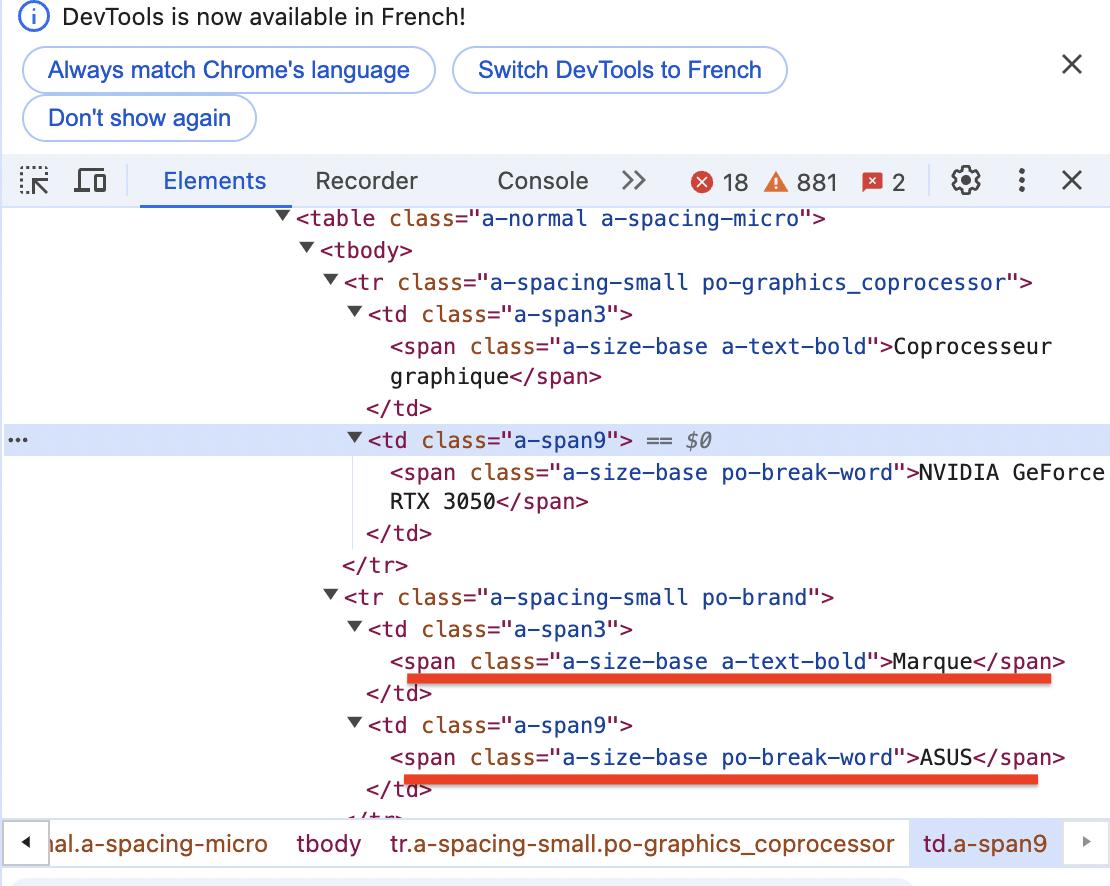

In [ ]:
df = pd.read_csv('Table_7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nom            133 non-null    object 
 1   URL            133 non-null    object 
 2   Prix (€)       133 non-null    object 
 3   Étoiles        133 non-null    float64
 4   Nombre d'Avis  133 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


In [ ]:
user_agents = [
    # Chrome - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",

    # Chrome - macOS
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.95 Safari/537.36",

    # Firefox - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0",

    # Safari - macOS
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_6_8) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15",

    # Edge - Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.2365.66",

    # Chrome - Android
    "Mozilla/5.0 (Linux; Android 11; SM-A515F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36",

    # Firefox - Linux
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0"
]


headers = {
    "User-Agent": random.choice(user_agents),
    "Accept-Language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "DNT": "1",  # Do Not Track
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document"
}



# Liste des caractéristiques qu'on veut récupérer

spec_targets = [
    "Coprocesseur graphique",
    "Marque",
    "Taille de la RAM graphique",
    "Vitesse d'horloge du GPU",
    "Interface de sortie vidéo",
    "Fabricant de processeurs graphiques",
    "Type de RAM graphique",
    "Usages recommandés pour le produit",
    "Composants inclus",
    "Appareils compatibles"
]

# Fonction qui récupère ces caractéristiques pour une url donnée

def scrape_specs_flexible(url):

    data = {}

    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return

        soup = BeautifulSoup(response.text, "html.parser")

        # Trouver toutes les paires nom : valeur

        labels = soup.find_all("span", class_="a-size-base a-text-bold") # Par-exemple, marque ou taille de RAM sera écrit ici
        for label in labels:
            nom = label.get_text(strip=True).rstrip(":")
            if nom in spec_targets:
                value_span = label.find_next("span", class_="a-size-base po-break-word") # Puis la valeur sera écrite ici
                if value_span:
                    data[nom] = value_span.get_text(strip=True)

    except Exception as e:
        print(f"⚠️ Erreur pour {url} : {e}")

    return data



In [ ]:
scrape_specs_flexible("https://www.amazon.fr/MSI-2GD3H-Graphique-Nvidia-Express/dp/B01AY78MLM/ref=sr_1_2")

{'Coprocesseur graphique': 'NVIDIA GeForce GT 710',
 'Marque': 'MSI',
 'Taille de la RAM graphique': '2 Go',
 "Vitesse d'horloge du GPU": '954 MHz',
 'Interface de sortie vidéo': 'DisplayPort',
 'Fabricant de processeurs graphiques': 'NVIDIA',
 'Type de RAM graphique': 'Mémoire GDDR3',
 'Usages recommandés pour le produit': 'Bureau',
 'Composants inclus': 'GT 710 2GD3H LP x 1',
 'Appareils compatibles': 'Cellphone'}

In [ ]:
specs_list = []
for i, url in enumerate(df["URL"]):
  print(f"🔎 Scraping {i+1}/{len(df)} : {url}")
  specs = scrape_specs_flexible(url)
  specs_list.append(specs)
  time.sleep(random.uniform(1.5, 3.0))  # Pause anti-blocage

🔎 Scraping 1/133 : https://www.amazon.fr/MSI-2GD3H-Graphique-Nvidia-Express/dp/B01AY78MLM
🔎 Scraping 2/133 : https://www.amazon.fr/MSI-Carte-graphique-VENTUS-912-V397-039/dp/B08WHJFYM8
🔎 Scraping 3/133 : https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/dp/B09Y57F1HL
🔎 Scraping 4/133 : https://www.amazon.fr/GIGABYTE-RX7600-XT-Gaming-OC-16GD/dp/B0CSSZCZZP
🔎 Scraping 5/133 : https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-GAMING-graphique/dp/B0C8ZS7N73
🔎 Scraping 6/133 : https://www.amazon.fr/ASUS-GeForce-Graphique-DisplayPort-DUAL-RTX3050-O6G/dp/B086ZSQZZ7
🔎 Scraping 7/133 : https://www.amazon.fr/PNY-Carte-Graphique-GeForce-RTXTM/dp/B0CZ188QHG
🔎 Scraping 8/133 : https://www.amazon.fr/Gigabyte-GeForce-Graphique-Gaming-V2/dp/B096Y2TYKV
🔎 Scraping 9/133 : https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-EAGLE-graphique/dp/B0C8ZRMDC3
🔎 Scraping 10/133 : https://www.amazon.fr/MSI-GeForce-RTX-3050-Ventus/dp/B0BSN1QFXX
🔎 Scraping 11/133 : https://www.amazon.fr/GIGABYTE-Carte-Graphique-Radeon-GAMING/dp/B

KeyboardInterrupt: 

In [ ]:
specs_list

In [ ]:

specs_list = [specs for specs in specs_list if specs and specs != {}]
specs_list


In [ ]:
df_specs = pd.DataFrame(specs_list)


In [ ]:
df_specs

In [ ]:
df

In [ ]:
df_final = pd.concat([df.reset_index(drop=True), df_specs], axis=1)

In [ ]:
df_final

In [ ]:
#df_final.to_csv('Table_8.csv', index=False)

In [ ]:
df = pd.read_csv('Table_8.csv')

In [ ]:
df

,Nom,URL,Prix (€),Étoiles,Nombre d'Avis,Coprocesseur graphique,Marque,Taille de la RAM graphique,Vitesse d'horloge du GPU,Interface de sortie vidéo,Fabricant de processeurs graphiques,Type de RAM graphique,Usages recommandés pour le produit,Composants inclus,Appareils compatibles
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,"40,85",4.5,9961,NVIDIA GeForce GT 710,MSI,2 Go,954 MHz,DisplayPort,NVIDIA,Mémoire GDDR3,Bureau,GT 710 2GD3H LP x 1,Cellphone
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,"260,62",4.6,2880,NVIDIA GeForce RTX 3060,MSI,12 Go,1807 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte Graphique,Ordinateur de bureau
2,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,"189,20",4.6,438,GeForce RTX 3050,MSI,8 Go,1807 MHz,"DisplayPort, DVI, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte graphique,Ordinateur de bureau
3,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,"301,65",4.1,223,AMD Radeon RX 7600 XT,GIGABYTE,16 Go,2810 MHz,"DisplayPort, HDMI",AMD,Mémoire GDDR6,Jeu,guide rapide,Ordinateur de bureau
4,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,"300,99",4.7,876,NVIDIA GeForce RTX 3050,ASUS,6 Go,4000 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Professionnel,N/C,Ordinateur de bureau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,"MSI B760 B760 GAMING PLUS WIFI Carte Mère, ATX...",https://www.amazon.fr/MSI-B760-Gaming-Plus-WiF...,"137,87",4.5,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,GIGABYTE B550M DS3H Carte mère - Processeurs A...,https://www.amazon.fr/GIGABYTE-Carte-Mere-B550...,"76,56",4.3,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,GIGABYTE B550 AORUS Elite V2 ATX,https://www.amazon.fr/GIGABYTE-B550-AORUS-Elit...,"106,08",4.4,1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,"MSI Pro H610M-E DDR4 Carte mère, Micro-ATX - p...",https://www.amazon.fr/MSI-H610M-DDR4-LGA1700-M...,"58,25",4.3,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

#### *2.2.2 Nettoyage de la base techniques*

Commençons par enlever les valeurs manquantes et les doublons :

In [ ]:
# On enlève les lignes avec un "Non disponible"

columns_to_check = ['Coprocesseur graphique', 'Marque', 'Taille de la RAM graphique',
                    "Vitesse d'horloge du GPU", 'Interface de sortie vidéo',
                    'Fabricant de processeurs graphiques', 'Type de RAM graphique',
                    'Usages recommandés pour le produit', 'Composants inclus',
                    'Appareils compatibles']

for col in columns_to_check:
    if col in df.columns:
        df = df[df[col] != "Non disponible"]

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(subset=['Nom'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nom                                  64 non-null     object 
 1   URL                                  64 non-null     object 
 2   Prix (€)                             64 non-null     object 
 3   Étoiles                              64 non-null     float64
 4   Nombre d'Avis                        64 non-null     int64  
 5   Coprocesseur graphique               64 non-null     object 
 6   Marque                               64 non-null     object 
 7   Taille de la RAM graphique           64 non-null     object 
 8   Vitesse d'horloge du GPU             64 non-null     object 
 9   Interface de sortie vidéo            64 non-null     object 
 10  Fabricant de processeurs graphiques  64 non-null     object 
 11  Type de RAM graphique             

In [ ]:
print("Nombre de valeurs:\n", df.describe(include='all').loc[['count']])

print("\nNombre de valeurs uniques:\n", df.describe(include='all').loc[['unique']])


Nombre de valeurs:
       Nom URL Prix (€)  Étoiles  Nombre d'Avis Coprocesseur graphique Marque  \
count  64  64       64     64.0           64.0                     64     64   

      Taille de la RAM graphique Vitesse d'horloge du GPU  \
count                         64                       64   

      Interface de sortie vidéo Fabricant de processeurs graphiques  \
count                        64                                  64   

      Type de RAM graphique Usages recommandés pour le produit  \
count                    64                                 64   

      Composants inclus Appareils compatibles  
count                64                    64  

Nombre de valeurs uniques:
        Nom URL Prix (€)  Étoiles  Nombre d'Avis Coprocesseur graphique Marque  \
unique  64  64       62      NaN            NaN                     42     11   

       Taille de la RAM graphique Vitesse d'horloge du GPU  \
unique                         16                       48   

       

On ne se retrouve plus que avec $64$ cartes graphiques différentes, c'est peu...

On va transformer les colonnes en numérique pour les étudier :

In [ ]:
df.head(64)

,Nom,URL,Prix (€),Étoiles,Nombre d'Avis,Coprocesseur graphique,Marque,Taille de la RAM graphique,Vitesse d'horloge du GPU,Interface de sortie vidéo,Fabricant de processeurs graphiques,Type de RAM graphique,Usages recommandés pour le produit,Composants inclus,Appareils compatibles
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,"40,85",4.5,9961,NVIDIA GeForce GT 710,MSI,2 Go,954 MHz,DisplayPort,NVIDIA,Mémoire GDDR3,Bureau,GT 710 2GD3H LP x 1,Cellphone
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,"260,62",4.6,2880,NVIDIA GeForce RTX 3060,MSI,12 Go,1807 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte Graphique,Ordinateur de bureau
2,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,"189,20",4.6,438,GeForce RTX 3050,MSI,8 Go,1807 MHz,"DisplayPort, DVI, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte graphique,Ordinateur de bureau
3,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,"301,65",4.1,223,AMD Radeon RX 7600 XT,GIGABYTE,16 Go,2810 MHz,"DisplayPort, HDMI",AMD,Mémoire GDDR6,Jeu,guide rapide,Ordinateur de bureau
4,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,"300,99",4.7,876,NVIDIA GeForce RTX 3050,ASUS,6 Go,4000 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Professionnel,N/C,Ordinateur de bureau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...",https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...,"56,18",4.1,219,GeForce RTX 3050,ASUS,5 Go,1537 MHz,PCI Express,NVIDIA,Mémoire GDDR6,Jeu,"carte graphique, Carte de garantie, guide d'in...",Ordinateur de bureau
60,Sapphire Pulse AMD Radeon™ RX 6500 XT ITX Pure...,https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...,"145,33",4.4,6,NVIDIA GeForce GT 1030,maxsun,2 Go,1468 MHz,"DVI, HDMI",NVIDIA,Mémoire GDDR5,"Professionnel, Jeu, Bureau",Support à profil bas,Ordinateur de bureau
61,MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...,https://www.amazon.fr/MSI-3050-Carte-Graphique...,"338,09",4.5,469,NVIDIA GeForce GT 730,SAPLOS,4 Go,902 MHz,"VGA, DisplayPort, HDMI",NVIDIA,Mémoire GDDR3,Bureau,Low profile bracket,Ordinateur de bureau
62,MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...,https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...,"135,82",4.1,71,AMD Radeon RX 550,QTHREE,4 Go,1183 MHz,"VGA, DVI, HDMI",AMD,Mémoire GDDR5,Bureau,Low profile bracket,Ordinateur de bureau


In [ ]:
#df.to_csv('Table_9.csv', index=False)

In [ ]:
df = pd.read_csv('Table_9.csv')

# Nettoyage des colonnes texte vers numérique

# RAM graphique (en Go)

df["Taille RAM (Go)"] = df["Taille de la RAM graphique"].astype(str).str.extract(r'(\d+)', expand=False)
df["Taille RAM (Go)"] = pd.to_numeric(df["Taille RAM (Go)"], errors="coerce")

# Horloge GPU (MHz)

df["Horloge GPU (MHz)"] = df["Vitesse d'horloge du GPU"].astype(str).str.extract(r'(\d+)', expand=False)
df["Horloge GPU (MHz)"] = pd.to_numeric(df["Horloge GPU (MHz)"], errors="coerce")

#Prix

df["Prix"] = df["Prix (€)"].astype(str).str.extract(r'(\d+)', expand=False)
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")



In [ ]:
df

,Nom,URL,Prix (€),Étoiles,Nombre d'Avis,Coprocesseur graphique,Marque,Taille de la RAM graphique,Vitesse d'horloge du GPU,Interface de sortie vidéo,Fabricant de processeurs graphiques,Type de RAM graphique,Usages recommandés pour le produit,Composants inclus,Appareils compatibles,Taille RAM (Go),Horloge GPU (MHz),Prix
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,"40,85",4.5,9961,NVIDIA GeForce GT 710,MSI,2 Go,954 MHz,DisplayPort,NVIDIA,Mémoire GDDR3,Bureau,GT 710 2GD3H LP x 1,Cellphone,2,954,40
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,"260,62",4.6,2880,NVIDIA GeForce RTX 3060,MSI,12 Go,1807 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte Graphique,Ordinateur de bureau,12,1807,260
2,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,"189,20",4.6,438,GeForce RTX 3050,MSI,8 Go,1807 MHz,"DisplayPort, DVI, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte graphique,Ordinateur de bureau,8,1807,189
3,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,"301,65",4.1,223,AMD Radeon RX 7600 XT,GIGABYTE,16 Go,2810 MHz,"DisplayPort, HDMI",AMD,Mémoire GDDR6,Jeu,guide rapide,Ordinateur de bureau,16,2810,301
4,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,"300,99",4.7,876,NVIDIA GeForce RTX 3050,ASUS,6 Go,4000 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Professionnel,N/C,Ordinateur de bureau,6,4000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...",https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...,"56,18",4.1,219,GeForce RTX 3050,ASUS,5 Go,1537 MHz,PCI Express,NVIDIA,Mémoire GDDR6,Jeu,"carte graphique, Carte de garantie, guide d'in...",Ordinateur de bureau,5,1537,56
60,Sapphire Pulse AMD Radeon™ RX 6500 XT ITX Pure...,https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...,"145,33",4.4,6,NVIDIA GeForce GT 1030,maxsun,2 Go,1468 MHz,"DVI, HDMI",NVIDIA,Mémoire GDDR5,"Professionnel, Jeu, Bureau",Support à profil bas,Ordinateur de bureau,2,1468,145
61,MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...,https://www.amazon.fr/MSI-3050-Carte-Graphique...,"338,09",4.5,469,NVIDIA GeForce GT 730,SAPLOS,4 Go,902 MHz,"VGA, DisplayPort, HDMI",NVIDIA,Mémoire GDDR3,Bureau,Low profile bracket,Ordinateur de bureau,4,902,338
62,MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...,https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...,"135,82",4.1,71,AMD Radeon RX 550,QTHREE,4 Go,1183 MHz,"VGA, DVI, HDMI",AMD,Mémoire GDDR5,Bureau,Low profile bracket,Ordinateur de bureau,4,1183,135


In [ ]:
#df.to_csv('Table_9.csv', index=False)

---

#### *2.2.3 Analyse graphique*

Traçons quelques courbes :

In [ ]:
df = pd.read_csv("Table_9.csv")

In [ ]:
df

,Nom,URL,Prix (€),Étoiles,Nombre d'Avis,Coprocesseur graphique,Marque,Taille de la RAM graphique,Vitesse d'horloge du GPU,Interface de sortie vidéo,Fabricant de processeurs graphiques,Type de RAM graphique,Usages recommandés pour le produit,Composants inclus,Appareils compatibles,Taille RAM (Go),Horloge GPU (MHz)
0,MSI GT 710 2GD3H LP Carte Graphique Nvidia GT7...,https://www.amazon.fr/MSI-2GD3H-Graphique-Nvid...,"40,85",4.5,9961,NVIDIA GeForce GT 710,MSI,2 Go,954 MHz,DisplayPort,NVIDIA,Mémoire GDDR3,Bureau,GT 710 2GD3H LP x 1,Cellphone,2,954
1,MSI GeForce RTX 3060 VENTUS 2X 12G OC Carte gr...,https://www.amazon.fr/MSI-Carte-graphique-VENT...,"260,62",4.6,2880,NVIDIA GeForce RTX 3060,MSI,12 Go,1807 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte Graphique,Ordinateur de bureau,12,1807
2,MSI GeForce RTX 3050 Ventus 2X XS 8G OC Carte ...,https://www.amazon.fr/MSI-RTX-3050-VENTUS-2X/d...,"189,20",4.6,438,GeForce RTX 3050,MSI,8 Go,1807 MHz,"DisplayPort, DVI, HDMI",NVIDIA,Mémoire GDDR6,Jeu,Carte graphique,Ordinateur de bureau,8,1807
3,GIGABYTE RX7600 XT Gaming OC-16GD,https://www.amazon.fr/GIGABYTE-RX7600-XT-Gamin...,"301,65",4.1,223,AMD Radeon RX 7600 XT,GIGABYTE,16 Go,2810 MHz,"DisplayPort, HDMI",AMD,Mémoire GDDR6,Jeu,guide rapide,Ordinateur de bureau,16,2810
4,Gigabyte NVIDIA GeForce RTX 4060 GAMING OC Car...,https://www.amazon.fr/Gigabyte-NVIDIA-GeForce-...,"300,99",4.7,876,NVIDIA GeForce RTX 3050,ASUS,6 Go,4000 MHz,"DisplayPort, HDMI",NVIDIA,Mémoire GDDR6,Professionnel,N/C,Ordinateur de bureau,6,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"Zotac GeForce GT 710 2Go GDDR3 1xHDMI, GT 710 ...",https://www.amazon.fr/Zotac-GT-710-Fan-Sink/dp...,"56,18",4.1,219,GeForce RTX 3050,ASUS,5 Go,1537 MHz,PCI Express,NVIDIA,Mémoire GDDR6,Jeu,"carte graphique, Carte de garantie, guide d'in...",Ordinateur de bureau,5,1537
60,Sapphire Pulse AMD Radeon™ RX 6500 XT ITX Pure...,https://www.amazon.fr/Sapphire-Pulse-RadeonTM-...,"145,33",4.4,6,NVIDIA GeForce GT 1030,maxsun,2 Go,1468 MHz,"DVI, HDMI",NVIDIA,Mémoire GDDR5,"Professionnel, Jeu, Bureau",Support à profil bas,Ordinateur de bureau,2,1468
61,MSI RTX 3050 Aero ITX 8G OC Carte Graphique V8...,https://www.amazon.fr/MSI-3050-Carte-Graphique...,"338,09",4.5,469,NVIDIA GeForce GT 730,SAPLOS,4 Go,902 MHz,"VGA, DisplayPort, HDMI",NVIDIA,Mémoire GDDR3,Bureau,Low profile bracket,Ordinateur de bureau,4,902
62,MAXSUN Geforce GTX 1050 Ti 4 Go GDDR5 128 bits...,https://www.amazon.fr/MAXSUN-GTX-1050Ti-Transf...,"135,82",4.1,71,AMD Radeon RX 550,QTHREE,4 Go,1183 MHz,"VGA, DVI, HDMI",AMD,Mémoire GDDR5,Bureau,Low profile bracket,Ordinateur de bureau,4,1183


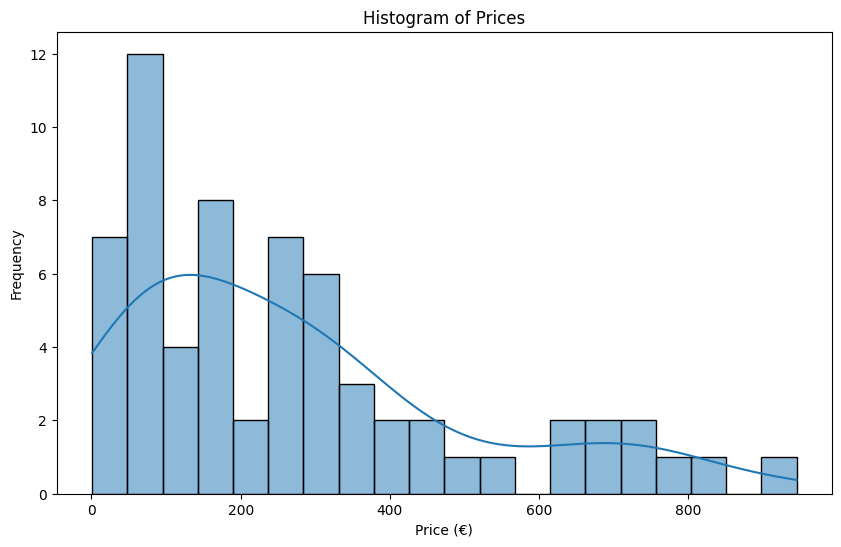

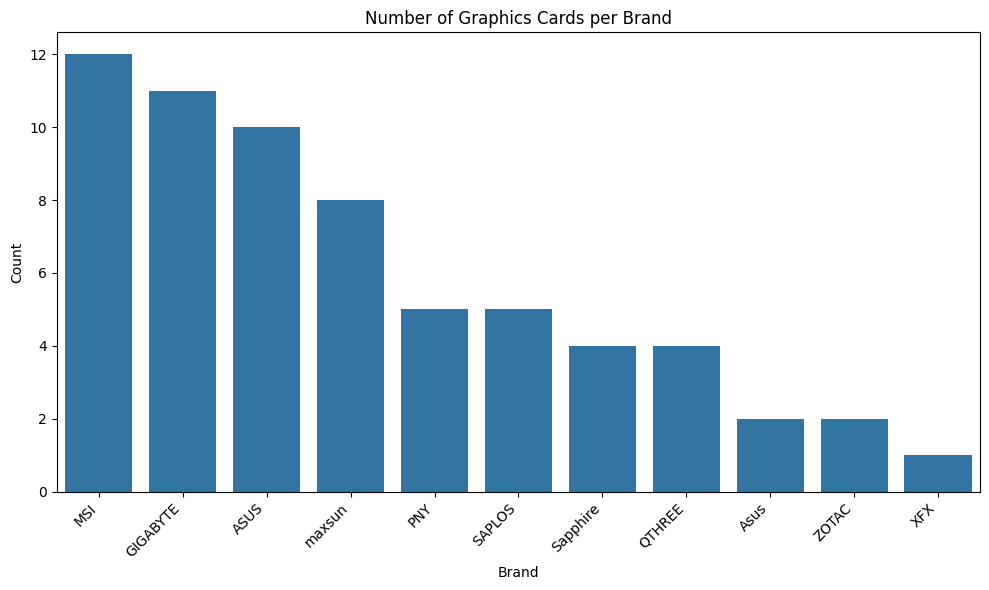

In [ ]:

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], bins=20, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()


# Create the bar plot
brand_counts = df['Marque'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Graphics Cards per Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


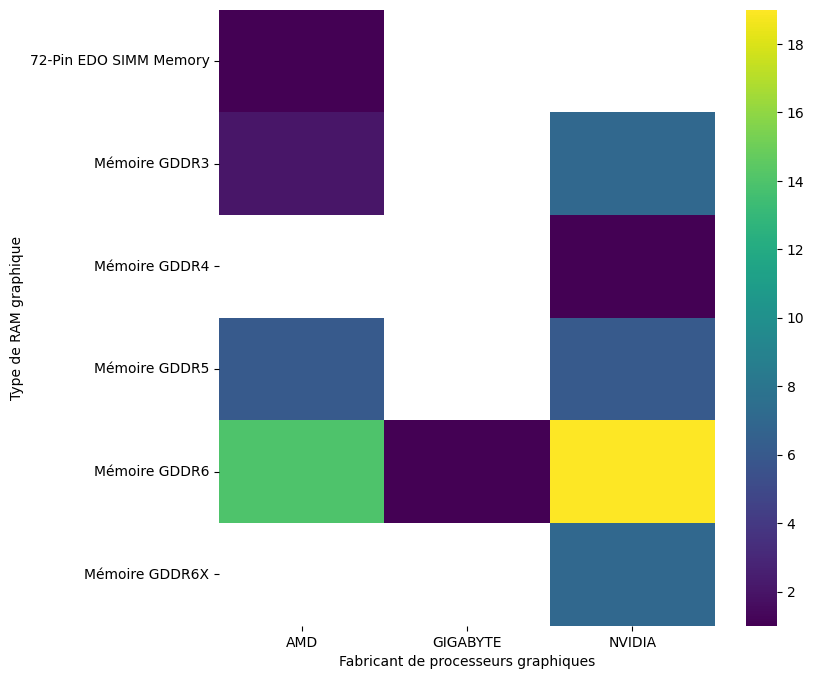

In [ ]:
# @title Fabricant de processeurs graphiques vs Type de RAM graphique

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type de RAM graphique'].value_counts()
    for x_label, grp in df.groupby('Fabricant de processeurs graphiques')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fabricant de processeurs graphiques')
_ = plt.ylabel('Type de RAM graphique')

<ipython-input-109-f99dc19664b3>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




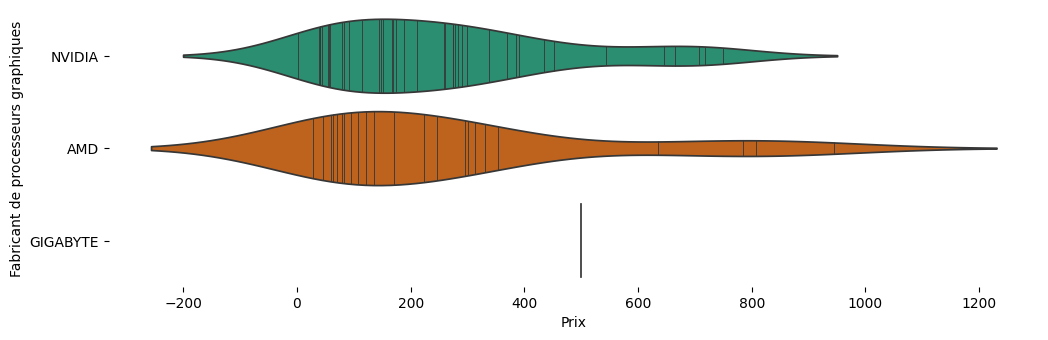

In [ ]:
# @title Fabricant de processeurs graphiques vs Prix

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fabricant de processeurs graphiques'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Prix', y='Fabricant de processeurs graphiques', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-110-d28a90581d79>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




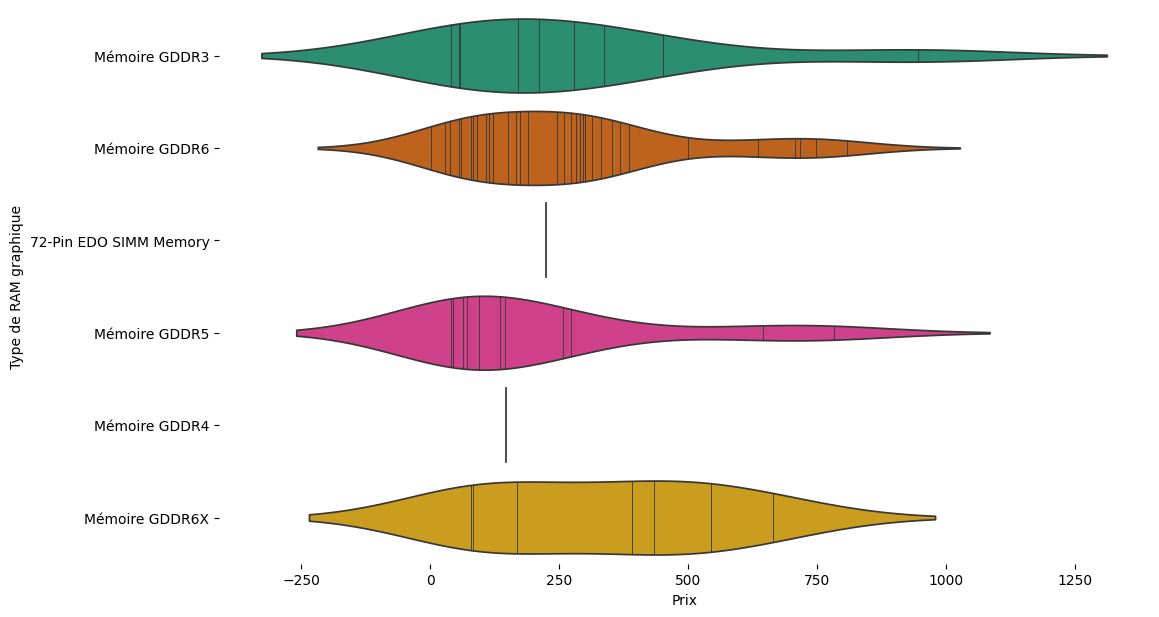

In [ ]:
# @title Type de RAM graphique vs Prix

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type de RAM graphique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Prix', y='Type de RAM graphique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

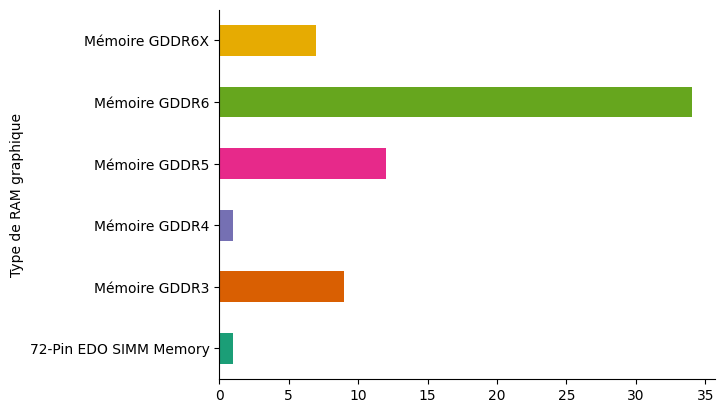

In [ ]:
# @title Type de RAM graphique

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type de RAM graphique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

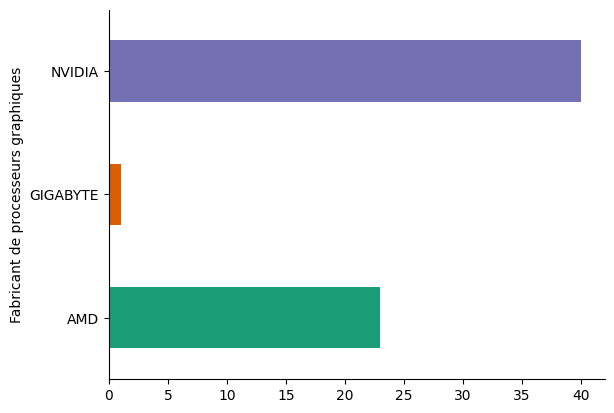

In [ ]:
# @title Fabricant de processeurs graphiques

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fabricant de processeurs graphiques').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

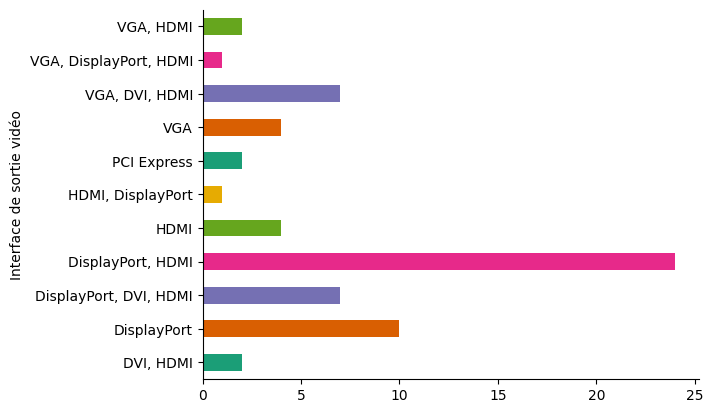

In [ ]:
# @title Interface de sortie vidéo

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Interface de sortie vidéo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Taille RAM (Go)", y="Prix",
                 color="Étoiles", size="Nombre d'Avis",
                 title="Prix en fonction de la RAM graphique",
                 labels={"Prix": "Prix (€)", "Taille RAM (Go)": "RAM (Go)"})

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[2, 4, 6, 8, 16],
        range=[1, 18],
        title="RAM (Go)"
    )
)
fig.show()


In [ ]:
fig = px.scatter(df, x="Horloge GPU (MHz)", y="Prix",
                 color="Taille RAM (Go)", size="Nombre d'Avis",
                 title="Prix vs Fréquence GPU",
                 labels={"Prix": "Prix (€)", "Horloge GPU (MHz)": "Fréquence GPU (MHz)"})
fig.show()


In [ ]:
fig = px.box(df, x="Taille RAM (Go)", y="Prix", points="all",
             title="Distribution des prix selon la RAM graphique")

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[2, 4, 6, 8, 16],
        range=[1, 18],
        title="RAM (Go)"
    )
)

fig.show()


In [ ]:
import plotly.figure_factory as ff

corr_data = df[["Prix", "Étoiles", "Nombre d'Avis", "Taille RAM (Go)", "Horloge GPU (MHz)"]].corr().round(2)
fig = ff.create_annotated_heatmap(
    z=corr_data.values,
    x=corr_data.columns.tolist(),
    y=corr_data.columns.tolist(),
    colorscale='RdBu', showscale=True)
fig.update_layout(title="Matrice de corrélation entre les variables")
fig.show()


In [ ]:

fig = px.box(
    df,
    x="Marque",
    y="Prix",
    points="all",  # affiche aussi les points individuels
    title="Prix des cartes graphiques par marque",
    labels={"Prix": "Prix (€)", "Marque": "Marque"},
    color="Marque"
)

fig.update_layout(
    xaxis_title="Marque",
    yaxis_title="Prix (€)",
    template="plotly_white",
    xaxis_tickangle=45
)

fig.show()


explication freq vitesse carte graphique ram etc

---

## **3 Modèle de machine learning pour prédire si best seller ou non**

moitié bestseller moitié non et on cherche les features qui ont le plus de poids pour prédire si un article est bestseller ou pas

avec les caractéristiques du produit

KNN (k-nearest neighbors)	✅	Marche très bien en petite dimension
Naïf Bayes	✅	Rapide, robuste, bonne baseline
Logistic Regression (binaire)	✅	Très bien pour classer best seller / non-best seller


Sur-apprentissage (overfitting) très probable

Résultats peu généralisables


Utilise peu de variables

Binarise les classes (ex : "Best Seller" = 1, sinon 0)

validation croisée cross_val_score avec cv=5



bons modèles pour peu de donnees :

KNN, Naïf Bayes, Logistic Regression (random forest? comparaison des modeles)